### Visualization

In [7]:
import pandas as pd
import os

In [8]:
project_directory=os.getcwd()
Datasets_path="C:\\Users\\asus\\Desktop\\Data Science\\Machine Learning\\Project\\Datasets"
Data=pd.read_csv(f"{Datasets_path}\\delays_train.csv")

In [220]:
print(Data.shape)
Data.isna().sum()

(1305061, 135)


Weekday                     0
Month_of_Year               0
Day_of_Month                0
Scheduled_Departure_Time    0
Scheduled_Arrival_Time      0
                           ..
Departure_State_VT          0
Departure_State_WA          0
Departure_State_WI          0
Departure_State_WV          0
Departure_State_WY          0
Length: 135, dtype: int64

### Splitting the Data

In [9]:
from sklearn.model_selection import train_test_split
X = Data.drop(columns=['Arrival_Delay'])  # Features excluding the target variable
y = Data['Arrival_Delay']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
Data=X_train
Data_y_train=y_train
Data_y_test=y_test
Data_X_test=X_test

In [174]:
Data.isna().sum()

Weekday                           0
Month_of_Year                     0
Day_of_Month                      0
Scheduled_Departure_Time          0
Scheduled_Arrival_Time            0
Marketing_Airline            130742
Marketing_Airline_DOT_ID          0
Flight_Number                     0
Origin_Airport_ID                 0
Destination_Airport_ID       130688
Flight_Cancelled                  0
Departure_State                   0
Arrival_State                     0
Departure_Delay              165344
Diverted_Airport_Landings         0
Taxi_Out_Time                 39331
Taxi_In_Time                  39836
Flight_Diverted                   0
Actual_Departure_Time         38616
Flight_Duration              169175
Flight_Distance              130740
Origin_Temperature           130740
Destination_Temperature      130740
Origin_Wind_Speed            169175
Destination_Wind_Speed       169175
Origin_Precipitation              0
Destination_Precipitation         0
dtype: int64

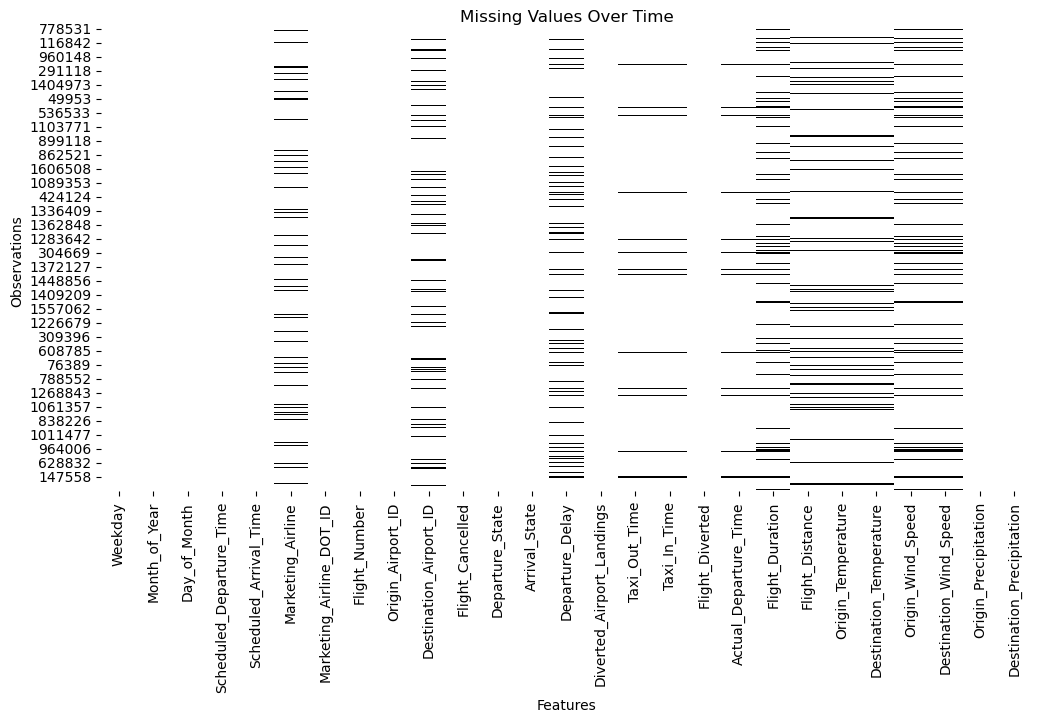

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot missingness pattern over time
plt.figure(figsize=(12, 6))
sns.heatmap(Data.isnull(), cmap='binary', cbar=False)
plt.title('Missing Values Over Time')
plt.xlabel('Features')
plt.ylabel('Observations')
plt.show()

In [11]:
def plot_feature_distribution(data, feature):
    """
    Draw histogram with KDE and box plot for a given feature.

    Parameters:
    - data: DataFrame containing the dataset.
    - feature: Name of the feature to plot.

    Returns:
    - None (displays the plots).
    """
    # Set up the figure with two subplots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

    # Plot histogram with KDE
    sns.histplot(data=data, x=feature, kde=True, ax=axes[0])
    axes[0].set_title('Histogram with KDE')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Density')

    # Plot box plot
    sns.boxplot(data=data, x=feature, ax=axes[1])
    axes[1].set_title('Box Plot')
    axes[1].set_xlabel(feature)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()


In [7]:
Data.isna().sum()

Weekday                           0
Month_of_Year                     0
Day_of_Month                      0
Scheduled_Departure_Time          0
Scheduled_Arrival_Time            0
Marketing_Airline            130742
Marketing_Airline_DOT_ID          0
Flight_Number                     0
Origin_Airport_ID                 0
Destination_Airport_ID       130688
Flight_Cancelled                  0
Departure_State                   0
Arrival_State                     0
Departure_Delay              165344
Diverted_Airport_Landings         0
Taxi_Out_Time                 39331
Taxi_In_Time                  39836
Flight_Diverted                   0
Actual_Departure_Time         38616
Flight_Duration              169175
Flight_Distance              130740
Origin_Temperature           130740
Destination_Temperature      130740
Origin_Wind_Speed            169175
Destination_Wind_Speed       169175
Origin_Precipitation              0
Destination_Precipitation         0
dtype: int64

### 1. Actual_Departure_Time

***Imputation***

In [12]:
import pandas as pd

# Group by Scheduled_Departure_Time and calculate the mean of Actual_Departure_Time for each group
mean_by_Scheduled_Departure_Time = Data.groupby('Scheduled_Departure_Time')['Actual_Departure_Time'].median()

# Impute missing values based on the mean of each group
missing_mask = Data['Actual_Departure_Time'].isnull()
Data.loc[missing_mask, 'Actual_Departure_Time'] = Data.loc[missing_mask, 'Scheduled_Departure_Time'].map(mean_by_Scheduled_Departure_Time)

# Check if there are any missing values left
missing_values_count = Data['Actual_Departure_Time'].isnull().sum()
print("Number of missing values after imputation:", missing_values_count)

Number of missing values after imputation: 1


In [13]:
Data['Actual_Departure_Time'].fillna(Data['Actual_Departure_Time'].mean(), inplace=True)

In [14]:
Data['Actual_Departure_Time'].isna().sum()

0

In [181]:
Data.Actual_Departure_Time.describe()

count    1.305061e+06
mean     1.335807e+03
std      5.054705e+02
min      1.000000e+00
25%      9.170000e+02
50%      1.326000e+03
75%      1.746000e+03
max      2.400000e+03
Name: Actual_Departure_Time, dtype: float64

### 2. Marketing_Airline

***Imputation*** 

In [15]:
Data['Original_Index'] = Data.index
Data = Data.groupby('Marketing_Airline_DOT_ID', group_keys=False).apply(
    lambda group: group.fillna({'Marketing_Airline': group['Marketing_Airline'].mode()[0]})
)

# Sort by the index column to restore the original ordera
Data = Data.sort_values('Original_Index').reset_index(drop=True)

# Drop the index column
Data = Data.drop(columns=['Original_Index'])

In [16]:
Data.head()

Weekday  Month_of_Year  Day_of_Month  Scheduled_Departure_Time  \
0        6              6            25                      1222   
1        2              6            21                      1216   
2        2              3            22                       700   
3        4              7            14                      2130   
4        1              5            30                       750   

   Scheduled_Arrival_Time Marketing_Airline  Marketing_Airline_DOT_ID  \
0                    1444                B6                     20409   
1                    1304                AA                     19805   
2                     924                AA                     19805   
3                    2359                AS                     19930   
4                     915                WN                     19393   

   Flight_Number  Origin_Airport_ID  Destination_Airport_ID  ...  \
0            520              10397                 12478.0  ...   
1           6297              14107                 15376.0  ...   
2           1538              15624                 11298.0  ...   
3           1116              14747                 12889.0  ...   
4           1336              14831                 14679.0  ...   

   Flight_Diverted Actual_Departure_Time Flight_Duration  Flight_Distance  \
0            False                1224.0           107.0            760.0   
1            False                1216.0            23.0            110.0   
2            False                 658.0           125.0            641.0   
3            False                2133.0           130.0            867.0   
4            False                 748.0            58.0            417.0   

   Origin_Temperature  Destination_Temperature  Origin_Wind_Speed  \
0           25.140220                19.357739          21.019808   
1           13.279939                20.470690          18.045064   
2           24.562566                14.509228          24.946489   
3            8.817992                10.866812          17.426336   
4            9.360464                15.977111          19.001179   

   Destination_Wind_Speed  Origin_Precipitation  Destination_Precipitation  
0               15.452723                   0.0                        0.0  
1               12.910265                   0.0                        0.0  
2               22.630553                   0.0                        0.0  
3               17.401007                   0.0                        0.0  
4               16.884960                   0.0                        0.0  

[5 rows x 27 columns]

***Encoding***

In [16]:
# Perform one-hot encoding on 'Marketing_Airline' column
Data = pd.get_dummies(Data, columns=['Marketing_Airline'], drop_first=True)

In [18]:
Data.head()

Weekday  Month_of_Year  Day_of_Month  Scheduled_Departure_Time  \
0        6              6            25                      1222   
1        2              6            21                      1216   
2        2              3            22                       700   
3        4              7            14                      2130   
4        1              5            30                       750   

   Scheduled_Arrival_Time  Marketing_Airline_DOT_ID  Flight_Number  \
0                    1444                     20409            520   
1                    1304                     19805           6297   
2                     924                     19805           1538   
3                    2359                     19930           1116   
4                     915                     19393           1336   

   Origin_Airport_ID  Destination_Airport_ID  Flight_Cancelled  ...  \
0              10397                 12478.0             False  ...   
1              14107                 15376.0             False  ...   
2              15624                 11298.0             False  ...   
3              14747                 12889.0             False  ...   
4              14831                 14679.0             False  ...   

  Destination_Precipitation Marketing_Airline_AS  Marketing_Airline_B6  \
0                       0.0                False                  True   
1                       0.0                False                 False   
2                       0.0                False                 False   
3                       0.0                 True                 False   
4                       0.0                False                 False   

   Marketing_Airline_DL  Marketing_Airline_F9  Marketing_Airline_G4  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   Marketing_Airline_HA  Marketing_Airline_NK  Marketing_Airline_UA  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   Marketing_Airline_WN  
0                 False  
1                 False  
2                 False  
3                 False  
4                  True  

[5 rows x 35 columns]

In [17]:
Data.isnull().sum()

Weekday                           0
Month_of_Year                     0
Day_of_Month                      0
Scheduled_Departure_Time          0
Scheduled_Arrival_Time            0
Marketing_Airline_DOT_ID          0
Flight_Number                     0
Origin_Airport_ID                 0
Destination_Airport_ID       130688
Flight_Cancelled                  0
Departure_State                   0
Arrival_State                     0
Departure_Delay              165344
Diverted_Airport_Landings         0
Taxi_Out_Time                 39331
Taxi_In_Time                  39836
Flight_Diverted                   0
Actual_Departure_Time             0
Flight_Duration              169175
Flight_Distance              130740
Origin_Temperature           130740
Destination_Temperature      130740
Origin_Wind_Speed            169175
Destination_Wind_Speed       169175
Origin_Precipitation              0
Destination_Precipitation         0
Marketing_Airline_AS              0
Marketing_Airline_B6        

In [ ]:
Data.columns

In [18]:
Data['Destination_Airport_ID'] = Data.groupby('Origin_Airport_ID')['Destination_Airport_ID'].transform(lambda x: x.fillna(x.mode()[0]))

# Ensure the order is the same as before
Data = Data.sort_index()

# Check if there are any missing values remaining
print("Remaining missing values after imputation:", Data['Destination_Airport_ID'].isnull().sum())

Remaining missing values after imputation: 0


In [19]:
Data.Destination_Airport_ID.value_counts()

Destination_Airport_ID
10397.0    85870
13930.0    78891
11292.0    71845
12953.0    70750
11298.0    65335
           ...  
12320.0       17
10643.0       12
13829.0       11
14222.0        5
10409.0        1
Name: count, Length: 374, dtype: int64

#### Destinaton Airport ID
**ENCODING**

In [19]:
destination_airport_frequency = Data['Destination_Airport_ID'].value_counts()
Data['Destination_Airport_ID'] = Data['Destination_Airport_ID'].map(destination_airport_frequency)
# Data_encoded = Data.drop('Origin_Airport_ID', axis=1)

In [48]:
Data.head()

Weekday  Month_of_Year  Day_of_Month  Scheduled_Departure_Time  \
0        6              6            25                       742   
1        2              6            21                       736   
2        2              3            22                       420   
3        4              7            14                      1290   
4        1              5            30                       470   

   Scheduled_Arrival_Time  Marketing_Airline_DOT_ID  Flight_Number  \
0                     884                     20409            520   
1                     784                     19805           6297   
2                     564                     19805           1538   
3                    1439                     19930           1116   
4                     555                     19393           1336   

   Origin_Airport_ID  Destination_Airport_ID  Flight_Cancelled  ...  \
0              10397                 12478.0             False  ...   
1              14107                 15376.0             False  ...   
2              15624                 11298.0             False  ...   
3              14747                 12889.0             False  ...   
4              14831                 14679.0             False  ...   

  Marketing_Airline_AS Marketing_Airline_B6  Marketing_Airline_DL  \
0                False                 True                 False   
1                False                False                 False   
2                False                False                 False   
3                 True                False                 False   
4                False                False                 False   

   Marketing_Airline_F9  Marketing_Airline_G4  Marketing_Airline_HA  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   Marketing_Airline_NK  Marketing_Airline_UA  Marketing_Airline_WN  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                  True   

   Destination_Airport_Frequency  
0                          25567  
1                           2673  
2                          55270  
3                          30112  
4                          15549  

[5 rows x 37 columns]

In [10]:
Data.columns

Index(['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Marketing_Airline_DOT_ID', 'Flight_Number',
       'Origin_Airport_ID', 'Destination_Airport_ID', 'Flight_Cancelled',
       'Departure_State', 'Arrival_State', 'Departure_Delay',
       'Diverted_Airport_Landings', 'Taxi_Out_Time', 'Taxi_In_Time',
       'Flight_Diverted', 'Actual_Departure_Time', 'Flight_Duration',
       'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature',
       'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation',
       'Destination_Precipitation', 'Origin_Airport_Frequency',
       'Marketing_Airline_AS', 'Marketing_Airline_B6', 'Marketing_Airline_DL',
       'Marketing_Airline_F9', 'Marketing_Airline_G4', 'Marketing_Airline_HA',
       'Marketing_Airline_NK', 'Marketing_Airline_UA', 'Marketing_Airline_WN',
       'Destination_Airport_Frequency'],
      dtype='object')

In [20]:
Data.isna().sum()

Weekday                               0
Month_of_Year                         0
Day_of_Month                          0
Scheduled_Departure_Time              0
Scheduled_Arrival_Time                0
Marketing_Airline_DOT_ID              0
Flight_Number                         0
Origin_Airport_ID                     0
Destination_Airport_ID                0
Flight_Cancelled                      0
Departure_State                       0
Arrival_State                         0
Departure_Delay                  165344
Diverted_Airport_Landings             0
Taxi_Out_Time                     39331
Taxi_In_Time                      39836
Flight_Diverted                       0
Actual_Departure_Time             38616
Flight_Duration                  169175
Flight_Distance                  130740
Origin_Temperature               130740
Destination_Temperature          130740
Origin_Wind_Speed                169175
Destination_Wind_Speed           169175
Origin_Precipitation                  0


### 3. Departure Delay
***Imputation***

In [20]:
import pandas as pd

# Convert time to minutes
def time_to_minutes(time):
    hours = time // 100
    minutes = time % 100
    return hours * 60 + minutes

# Calculate Departure_Delay
def calculate_departure_delay(df):
    # Ensure both Actual_Departure_Time and Scheduled_Departure_Time are present
    mask = df['Actual_Departure_Time'].notna() & df['Scheduled_Departure_Time'].notna()
    
    # Apply conversion and subtraction to calculate delay
    df.loc[mask, 'Departure_Delay'] = (
        time_to_minutes(df.loc[mask, 'Actual_Departure_Time'].astype(int)) -
        time_to_minutes(df.loc[mask, 'Scheduled_Departure_Time'].astype(int))
    )
    
    return df

# Apply the function to Data DataFrame
Data = calculate_departure_delay(Data)

In [21]:
# Group by 'Scheduled_Departure_Time' and fill missing values of 'Departure_Delay' with mean
Data['Departure_Delay'] = Data.groupby('Scheduled_Departure_Time')['Departure_Delay'].transform(lambda x: x.fillna(x.mean()))

In [215]:
Data['Departure_Delay'].fillna(Data['Departure_Delay'].mean(), inplace=True)

In [22]:
Data.Departure_Delay.isna().sum()

0

***Option 2***

In [139]:
# import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import train_test_split

# # Simplify the feature set
# features = ['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
#        'Scheduled_Arrival_Time', 
#        'Marketing_Airline_DOT_ID', 'Flight_Number', 'Origin_Airport_ID',
#        'Destination_Airport_ID', 'Flight_Cancelled', 'Departure_State',
#        'Arrival_State', 'Departure_Delay', 'Diverted_Airport_Landings',
#        'Taxi_Out_Time', 'Taxi_In_Time', 'Flight_Diverted',
#        'Actual_Departure_Time', 'Flight_Duration', 'Flight_Distance',
#        'Origin_Temperature', 'Destination_Temperature', 'Origin_Wind_Speed',
#        'Destination_Wind_Speed', 'Origin_Precipitation',
#        'Destination_Precipitation']

# # Separate the features and target variable
# X = Data[features]
# y = Data['Departure_Delay']

# # Drop rows with missing target values for training
# train_data = Data.dropna(subset=['Departure_Delay'])

# # Separate features and target for the training set
# X_train = train_data[features]
# y_train = train_data['Departure_Delay']

# # Preprocessing for numerical data: impute missing values with the mean and scale
# numeric_features = ['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
#                     'Scheduled_Arrival_Time', 'Marketing_Airline_DOT_ID', 'Flight_Number',
#                     'Origin_Airport_ID', 'Destination_Airport_ID', 'Flight_Cancelled',
#                     'Diverted_Airport_Landings', 'Taxi_Out_Time', 'Taxi_In_Time',
#                     'Flight_Diverted', 'Actual_Departure_Time', 'Flight_Duration',
#                     'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature',
#                     'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation',
#                     'Destination_Precipitation']

# categorical_features = ['Departure_State','Departure_State']

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Create a pipeline that includes preprocessing and the regression model
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

# # Fit the pipeline on the training data
# pipeline.fit(X_train, y_train)

# # Predict missing Departure_Delay values
# missing_indices = Data['Departure_Delay'].isnull()
# X_missing = Data.loc[missing_indices, features]
# Data.loc[missing_indices, 'Departure_Delay'] = pipeline.predict(X_missing)

In [22]:
Data.Departure_Delay.describe()

count    1.305061e+06
mean     4.770400e+00
std      9.754124e+01
min     -1.438000e+03
25%     -5.000000e+00
50%     -2.000000e+00
75%      9.000000e+00
max      1.438000e+03
Name: Departure_Delay, dtype: float64

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


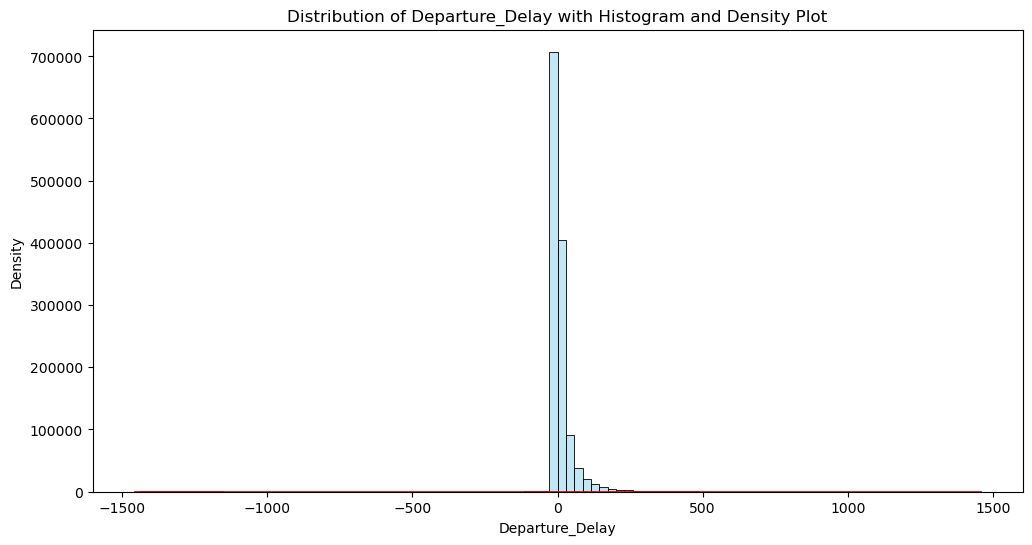

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
departure_delay = Data['Departure_Delay']
plt.figure(figsize=(12, 6))
sns.histplot(departure_delay, bins=100, kde=False, color='skyblue', edgecolor='black', alpha=0.5)
sns.kdeplot(departure_delay, color='red', linewidth=2)
plt.title('Distribution of Departure_Delay with Histogram and Density Plot')
plt.xlabel('Departure_Delay')
plt.ylabel('Density')
plt.show()

In [23]:
import numpy as np
departure_delay = Data['Departure_Delay']
# Apply log transformation
transformed_data = np.log(departure_delay - departure_delay.min() + 1)  # Adding 1 to ensure non-zero values
Data['Departure_Delay'] = transformed_data

In [237]:
Data['Departure_Delay'].describe()

count    1.305061e+06
mean     4.770400e+00
std      9.754124e+01
min     -1.438000e+03
25%     -5.000000e+00
50%     -2.000000e+00
75%      9.000000e+00
max      1.438000e+03
Name: Departure_Delay, dtype: float64

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


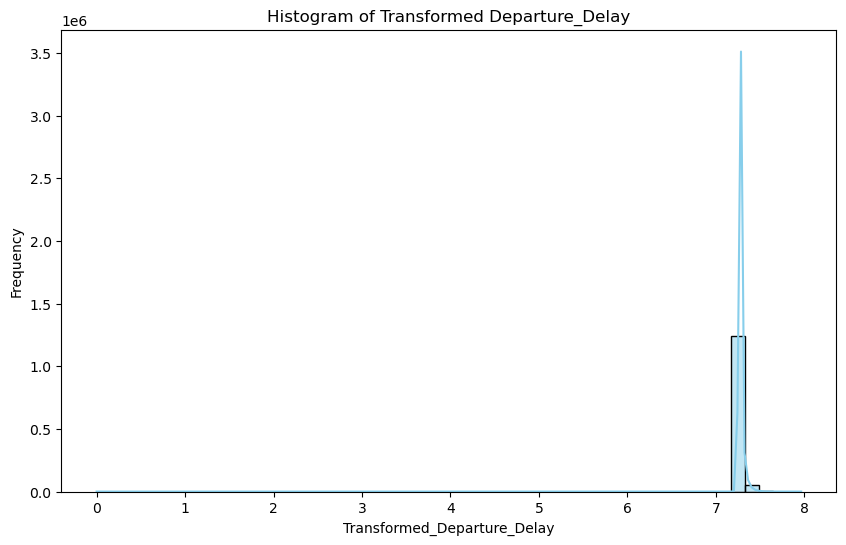

In [190]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Departure_Delay'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Transformed Departure_Delay')
plt.xlabel('Transformed_Departure_Delay')
plt.ylabel('Frequency')
plt.show()

In [24]:
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    
    # Count outliers
    num_outliers = outliers.sum()
    
    return num_outliers

# Assuming 'Data' is your DataFrame and 'Feature_Column' is the column you want to detect outliers in
num_outliers = count_outliers_iqr(Data['Departure_Delay'])
print("Number of outliers:", num_outliers)


Number of outliers: 176119


In [25]:
import numpy as np

def remove_outliers_iqr(transformed_data):
    Q1 = np.percentile(transformed_data, 25)
    Q3 = np.percentile(transformed_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with boundary values
    transformed_data[transformed_data < lower_bound] = lower_bound
    transformed_data[transformed_data > upper_bound] = upper_bound
    
    return transformed_data

In [26]:
transformed_data = Data['Departure_Delay']
cleaned_transformed_data = remove_outliers_iqr(transformed_data)
Data['Departure_Delay'] = cleaned_transformed_data

C:\Users\asus\AppData\Local\Temp\ipykernel_13468\4041703645.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data[transformed_data < lower_bound] = lower_bound
C:\Users\asus\AppData\Local\Temp\ipykernel_13468\4041703645.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data[transformed_data > upper_bound] = upper_bound


In [27]:
Data['Departure_Delay'].describe()

count    1.305061e+06
mean     7.274169e+00
std      9.155687e-03
min      7.253650e+00
25%      7.268223e+00
50%      7.270313e+00
75%      7.277939e+00
max      7.292512e+00
Name: Departure_Delay, dtype: float64

In [224]:
# import numpy as np

# # Assuming 'Data' is your DataFrame and 'Departure_Delay' is the column you want to winsorize
# departure_delay = Data['Departure_Delay']

# # Define the percentile thresholds for winsorization (e.g., 5th and 95th percentiles)
# low_percentile = 5
# high_percentile = 95

# # Calculate the percentile values
# low_threshold = np.percentile(departure_delay, low_percentile)
# high_threshold = np.percentile(departure_delay, high_percentile)

# # Apply winsorization to cap the extreme values
# winsorized_departure_delay = np.clip(departure_delay, low_threshold, high_threshold)

# # Update the 'Departure_Delay' column in the DataFrame with the winsorized values
# Data['Departure_Delay'] = winsorized_departure_delay

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


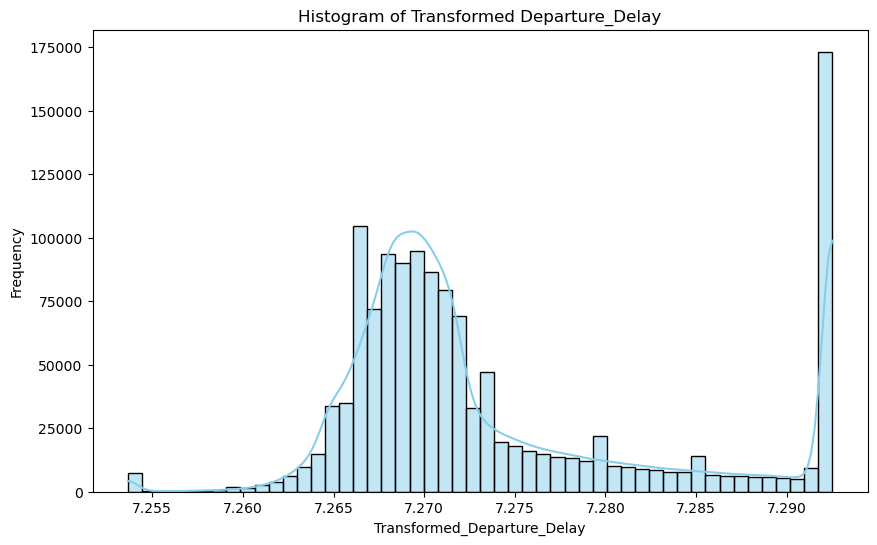

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Departure_Delay'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Transformed Departure_Delay')
plt.xlabel('Transformed_Departure_Delay')
plt.ylabel('Frequency')
plt.show()

In [238]:
Data.isna().sum()

Weekday                           0
Month_of_Year                     0
Day_of_Month                      0
Scheduled_Departure_Time          0
Scheduled_Arrival_Time            0
Marketing_Airline_DOT_ID          0
Flight_Number                     0
Origin_Airport_ID                 0
Destination_Airport_ID       130688
Flight_Cancelled                  0
Departure_State                   0
Arrival_State                     0
Departure_Delay                   0
Diverted_Airport_Landings         0
Taxi_Out_Time                 39331
Taxi_In_Time                  39836
Flight_Diverted                   0
Actual_Departure_Time             0
Flight_Duration              169175
Flight_Distance              130740
Origin_Temperature           130740
Destination_Temperature      130740
Origin_Wind_Speed            169175
Destination_Wind_Speed       169175
Origin_Precipitation              0
Destination_Precipitation         0
Marketing_Airline_AS              0
Marketing_Airline_B6        

In [14]:
Data.columns 

Index(['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Marketing_Airline_DOT_ID', 'Flight_Number',
       'Origin_Airport_ID', 'Destination_Airport_ID', 'Flight_Cancelled',
       'Departure_State', 'Arrival_State', 'Departure_Delay',
       'Diverted_Airport_Landings', 'Taxi_Out_Time', 'Taxi_In_Time',
       'Flight_Diverted', 'Actual_Departure_Time', 'Flight_Duration',
       'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature',
       'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation',
       'Destination_Precipitation', 'Origin_Airport_Frequency',
       'Marketing_Airline_AS', 'Marketing_Airline_B6', 'Marketing_Airline_DL',
       'Marketing_Airline_F9', 'Marketing_Airline_G4', 'Marketing_Airline_HA',
       'Marketing_Airline_NK', 'Marketing_Airline_UA', 'Marketing_Airline_WN',
       'Destination_Airport_Frequency'],
      dtype='object')

### 4. Taxi_Out_Time
***Imputation***

**Option 1**

In [29]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Select relevant features
relevant_features = ['Origin_Airport_ID', 'Taxi_Out_Time']

# Group by 'Origin_Airport_ID' and impute missing values of 'Taxi_Out_Time' by median within each group
grouped = Data.groupby(['Origin_Airport_ID'])
imputer = SimpleImputer(strategy='median') # median

# Impute missing values for 'Taxi_Out_Time' within each group
Data['Taxi_Out_Time'] = grouped['Taxi_Out_Time'].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten())

In [30]:
Data.Taxi_Out_Time.isna().sum()

0

#### ***Option 2***

In [ ]:
# import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression

# # Define the features
# features = ['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
#             'Scheduled_Arrival_Time', 'Marketing_Airline_DOT_ID', 'Flight_Number',
#             'Origin_Airport_ID', 'Destination_Airport_ID', 'Flight_Cancelled',
#             'Departure_State', 'Arrival_State', 'Departure_Delay',
#             'Diverted_Airport_Landings', 'Taxi_In_Time', 'Flight_Diverted',
#             'Actual_Departure_Time', 'Flight_Duration', 'Flight_Distance',
#             'Origin_Temperature', 'Destination_Temperature', 'Origin_Wind_Speed',
#             'Destination_Wind_Speed', 'Origin_Precipitation', 'Destination_Precipitation']


# # Separate data with and without missing Taxi_Out_Time
# train_data = Data.dropna(subset=['Taxi_Out_Time'])
# test_data = Data[Data['Taxi_Out_Time'].isnull()]

# # Separate features and target for the training set
# X_train = train_data[features]
# y_train = train_data['Taxi_Out_Time']

# # Preprocessing for numerical data: impute missing values with the mean and scale
# numeric_features = ['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
#                     'Scheduled_Arrival_Time', 'Marketing_Airline_DOT_ID', 'Flight_Number',
#                     'Origin_Airport_ID', 'Destination_Airport_ID', 'Flight_Cancelled',
#                     'Departure_Delay', 'Diverted_Airport_Landings', 'Taxi_In_Time',
#                     'Flight_Diverted', 'Actual_Departure_Time', 'Flight_Duration',
#                     'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature',
#                     'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation',
#                     'Destination_Precipitation']

# categorical_features = ['Departure_State', 'Arrival_State']

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# # Create a pipeline that includes preprocessing and the regression model
# pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', LinearRegression())
# ])

# # Fit the pipeline on the training data
# pipeline.fit(X_train, y_train)

# # Prepare the test data
# X_test = test_data[features]

# # Predict missing Taxi_Out_Time values
# test_data['Taxi_Out_Time'] = pipeline.predict(X_test)

# # Combine the imputed test data with the original data
# Data.loc[test_data.index, 'Taxi_Out_Time'] = test_data['Taxi_Out_Time']

#### ***Log Transformation***

In [32]:
Data.Taxi_Out_Time.describe()

count    1.305061e+06
mean     1.691727e+01
std      9.363134e+00
min      1.000000e+00
25%      1.100000e+01
50%      1.500000e+01
75%      1.900000e+01
max      1.840000e+02
Name: Taxi_Out_Time, dtype: float64

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


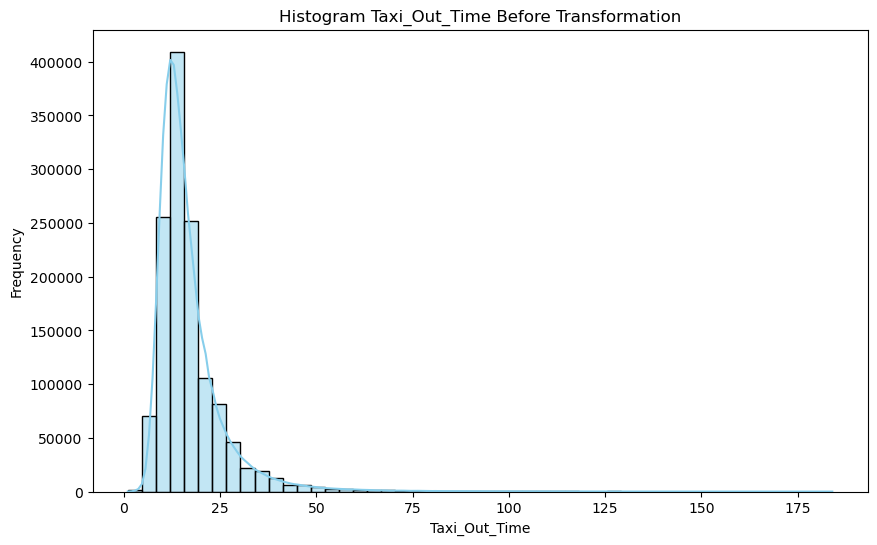

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Taxi_Out_Time'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Taxi_Out_Time Before Transformation')
plt.xlabel('Taxi_Out_Time')
plt.ylabel('Frequency')
plt.show()

In [32]:
# Adding a small constant to avoid zero or negative values
Data['Taxi_Out_Time'] += 1e-6  # Adding a small constant like 1e-6

# Transformation
Data['Taxi_Out_Time'] = np.log(Data['Taxi_Out_Time'])  # Log transformation

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


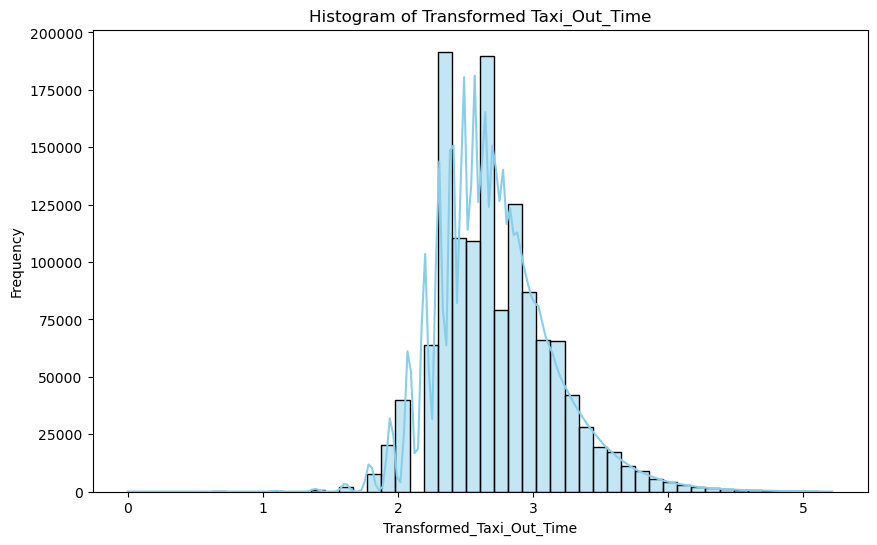

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Taxi_Out_Time'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Transformed Taxi_Out_Time')
plt.xlabel('Transformed_Taxi_Out_Time')
plt.ylabel('Frequency')
plt.show()

In [203]:
Data.Taxi_Out_Time.describe()

count    1.305061e+06
mean     2.726974e+00
std      4.245519e-01
min      9.999995e-07
25%      2.397895e+00
50%      2.708050e+00
75%      2.944439e+00
max      5.214936e+00
Name: Taxi_Out_Time, dtype: float64

### 5. Taxi_In_Time
***Imputation***

**Option1**

In [34]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Select relevant features
relevant_features = ['Marketing_Airline_DOT_ID', 'Taxi_In_Time']

# Group by 'Destination_Airport_ID' and impute missing values of 'Taxi_In_Time' by median within each group
grouped = Data.groupby(['Marketing_Airline_DOT_ID'])
imputer = SimpleImputer(strategy='median')

# Impute missing values for 'Taxi_In_Time' within each group
Data['Taxi_In_Time'] = grouped['Taxi_In_Time'].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten())


In [35]:
Data.Taxi_In_Time.isna().sum()

0

***Option 2***

In [142]:
# import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LinearRegression

# # Define the features
# features = ['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
#             'Scheduled_Arrival_Time', 'Marketing_Airline_DOT_ID', 'Flight_Number',
#             'Origin_Airport_ID', 'Destination_Airport_ID', 'Flight_Cancelled',
#             'Departure_State', 'Arrival_State', 'Departure_Delay',
#             'Diverted_Airport_Landings', 'Flight_Diverted',
#             'Actual_Departure_Time', 'Flight_Duration', 'Flight_Distance',
#             'Origin_Temperature', 'Destination_Temperature', 'Origin_Wind_Speed',
#             'Destination_Wind_Speed', 'Origin_Precipitation', 'Destination_Precipitation']

# # Preprocessing for numerical data: impute missing values with the mean and scale
# numeric_features = ['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
#                     'Scheduled_Arrival_Time', 'Marketing_Airline_DOT_ID', 'Flight_Number',
#                     'Origin_Airport_ID', 'Destination_Airport_ID', 'Flight_Cancelled',
#                     'Departure_Delay', 'Diverted_Airport_Landings',
#                     'Flight_Diverted', 'Actual_Departure_Time', 'Flight_Duration',
#                     'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature',
#                     'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation',
#                     'Destination_Precipitation']

# categorical_features = ['Departure_State', 'Arrival_State']

# numeric_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)
#     ])

# def impute_missing_values(target_feature):
#     # Separate data with and without missing values for the target feature
#     train_data = Data.dropna(subset=[target_feature])
#     test_data = Data[Data[target_feature].isnull()]

#     # If there's no test data, skip
#     if test_data.empty:
#         return

#     # Separate features and target for the training set
#     X_train = train_data[features]
#     y_train = train_data[target_feature]

#     # Create a pipeline that includes preprocessing and the regression model
#     pipeline = Pipeline(steps=[
#         ('preprocessor', preprocessor),
#         ('regressor', LinearRegression())
#     ])

#     # Fit the pipeline on the training data
#     pipeline.fit(X_train, y_train)

#     # Prepare the test data
#     X_test = test_data[features]

#     # Predict missing values for the target feature
#     test_data[target_feature] = pipeline.predict(X_test)

#     # Combine the imputed test data with the original data
#     Data.loc[test_data.index, target_feature] = test_data[target_feature]

# # Impute missing values for Taxi_In_Time
# impute_missing_values('Taxi_In_Time')

C:\Users\asus\AppData\Local\Temp\ipykernel_14604\2672032912.py:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[target_feature] = pipeline.predict(X_test)


In [37]:
Data.Taxi_In_Time.describe()

count    1.305061e+06
mean     7.850245e+00
std      6.557261e+00
min      1.000000e+00
25%      4.000000e+00
50%      6.000000e+00
75%      9.000000e+00
max      2.870000e+02
Name: Taxi_In_Time, dtype: float64

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


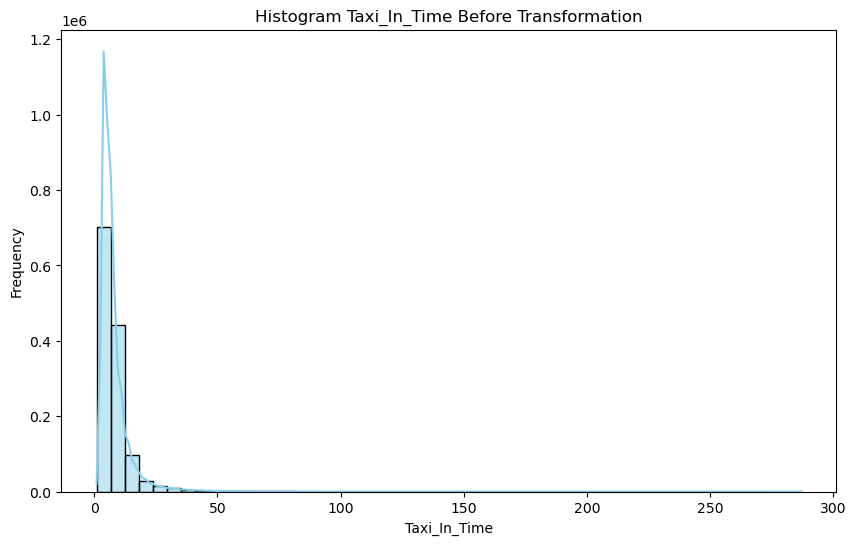

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Taxi_In_Time'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Taxi_In_Time Before Transformation')
plt.xlabel('Taxi_In_Time')
plt.ylabel('Frequency')
plt.show()

In [36]:
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    
    # Count outliers
    num_outliers = outliers.sum()
    
    return num_outliers

# Assuming 'Data' is your DataFrame and 'Feature_Column' is the column you want to detect outliers in
num_outliers = count_outliers_iqr(Data['Taxi_In_Time'])
print("Number of outliers:", num_outliers)


Number of outliers: 83359


In [37]:
Data['Taxi_In_Time'] = np.log(Data['Taxi_In_Time'] + 1)  # Adding 1 to handle zero values

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


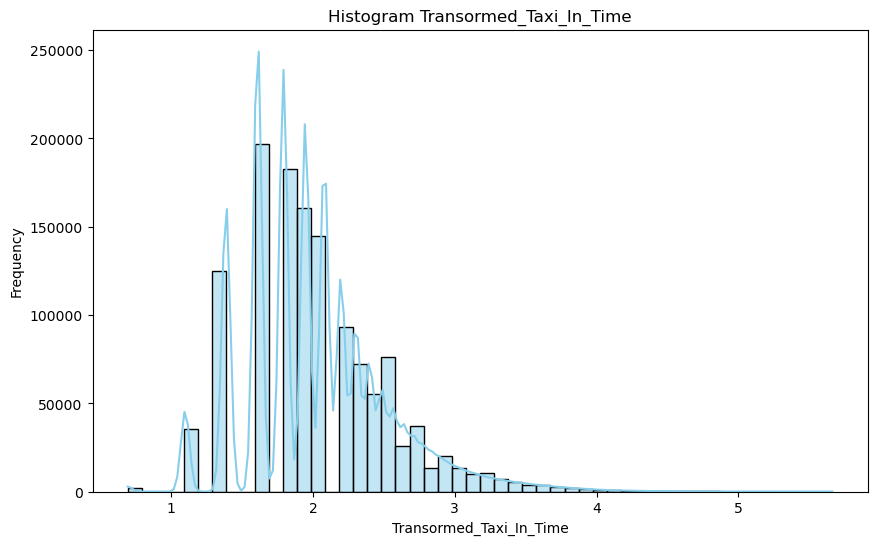

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Taxi_In_Time'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Transormed_Taxi_In_Time')
plt.xlabel('Transormed_Taxi_In_Time')
plt.ylabel('Frequency')
plt.show()

In [40]:
Data['Taxi_In_Time'].describe()

count    1.305061e+06
mean     2.028593e+00
std      5.074115e-01
min      6.931472e-01
25%      1.609438e+00
50%      1.945910e+00
75%      2.302585e+00
max      5.662960e+00
Name: Taxi_In_Time, dtype: float64

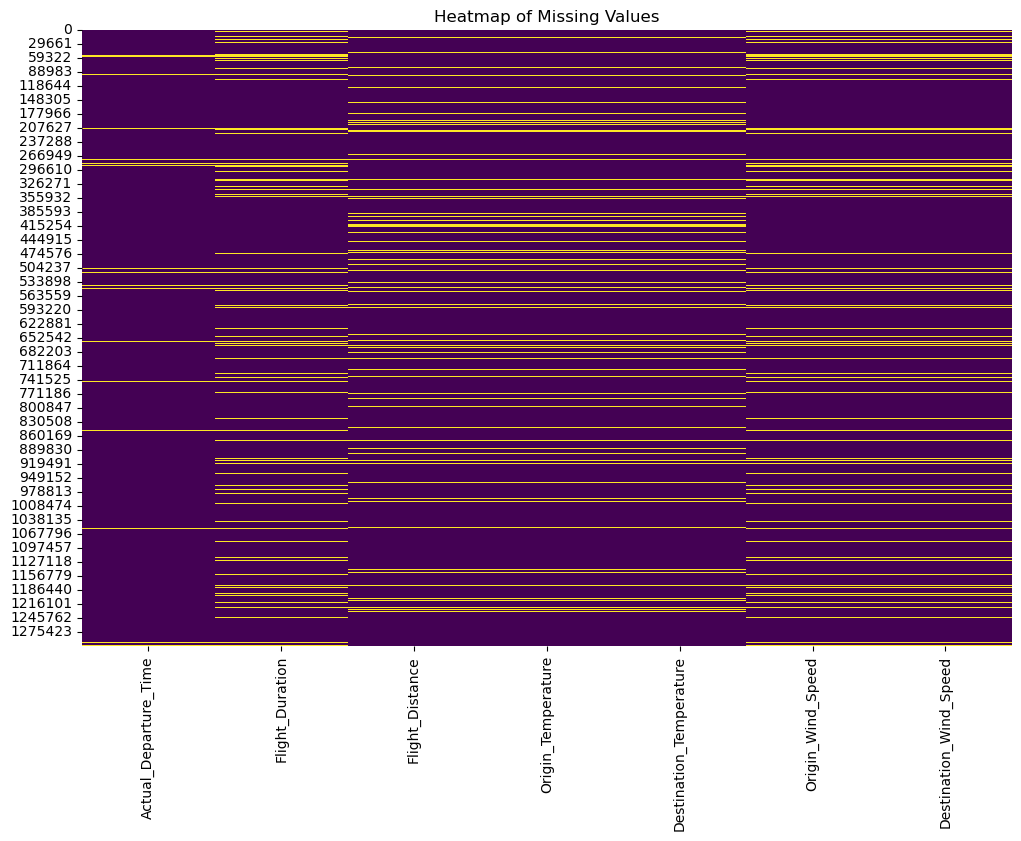

<Figure size 1200x800 with 0 Axes>

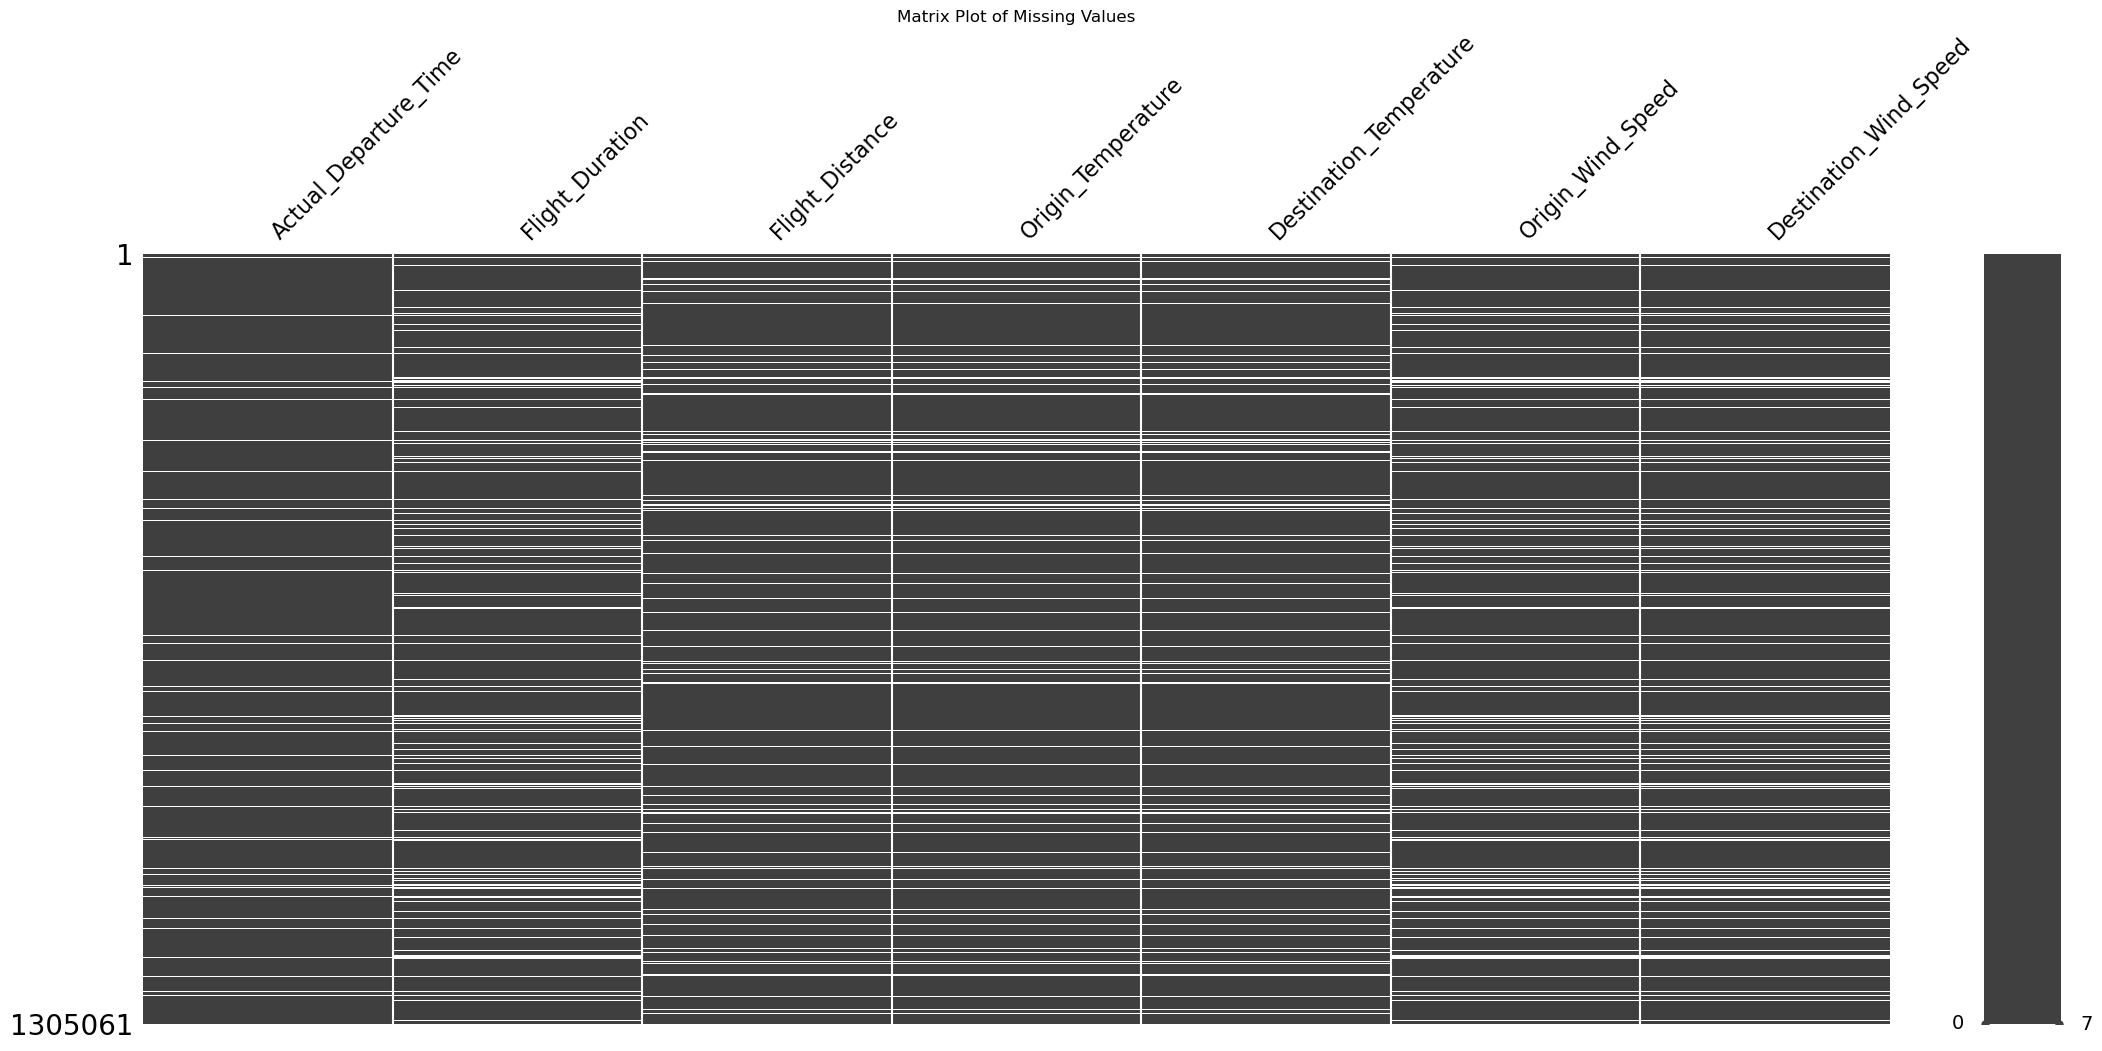

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

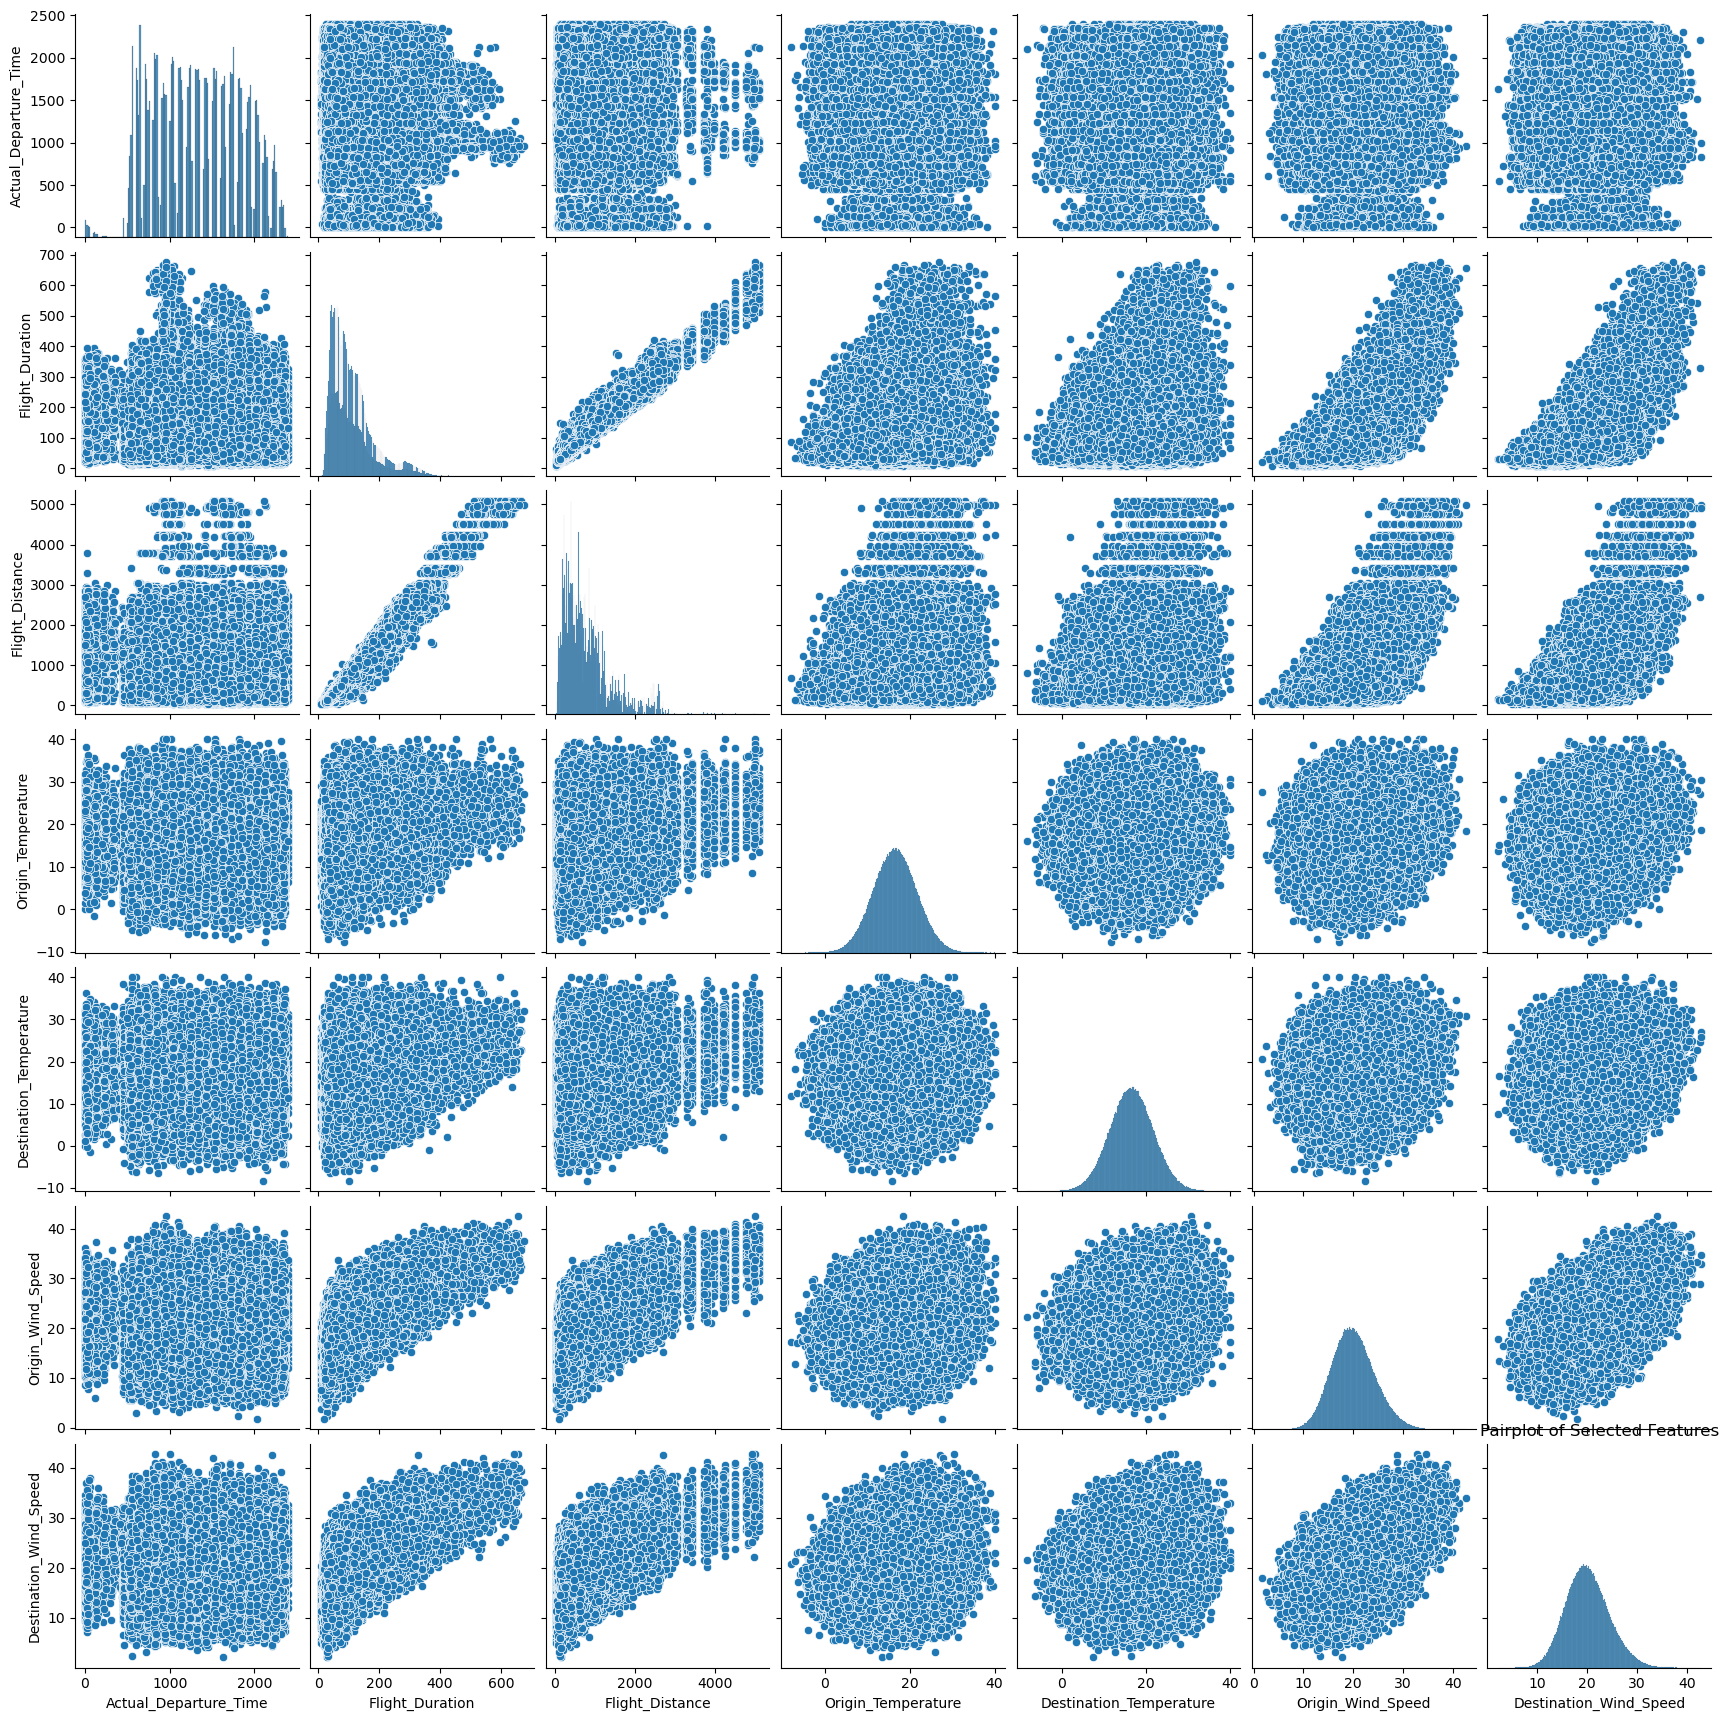

In [330]:
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Subset the data for the relevant features
missing_data_features = ['Actual_Departure_Time', 'Flight_Duration', 'Flight_Distance',
                         'Origin_Temperature', 'Destination_Temperature',
                         'Origin_Wind_Speed', 'Destination_Wind_Speed']

# Heatmap of the missing values
plt.figure(figsize=(12, 8))
sns.heatmap(Data[missing_data_features].isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values')
plt.show()

# Missingno matrix plot
plt.figure(figsize=(12, 8))
msno.matrix(Data[missing_data_features])
plt.title('Matrix Plot of Missing Values')
plt.show()

# Pairplot to visualize relationships and missing patterns
sns.pairplot(Data[missing_data_features])
plt.title('Pairplot of Selected Features')
plt.show()

### 6. Flight_Duration
***Imputation***

***Option 1***

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


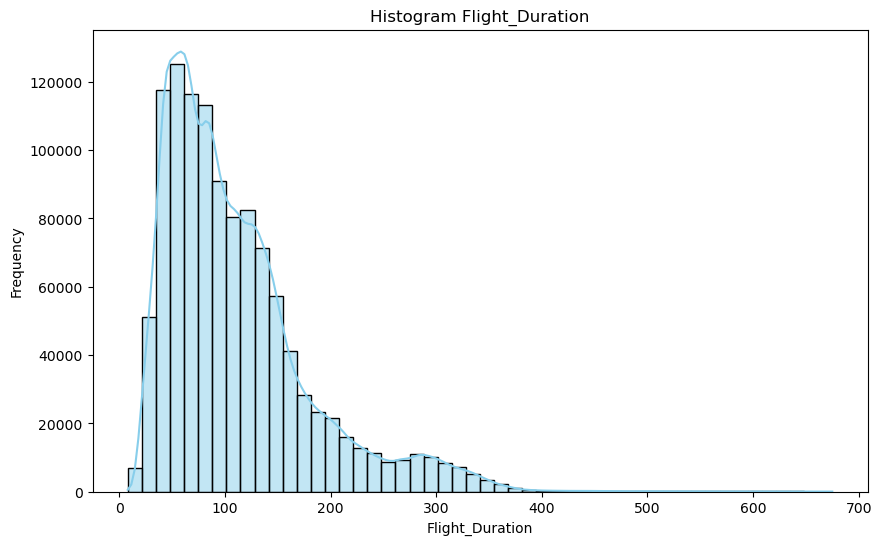

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Flight_Duration'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Flight_Duration')
plt.xlabel('Flight_Duration')
plt.ylabel('Frequency')
plt.show()

In [40]:
from sklearn.impute import SimpleImputer

# Group by 'Flight_Distance' and impute missing values of 'Flight_Duration' by mean within each group
grouped = Data.groupby(['Origin_Airport_ID'])
imputer = SimpleImputer(strategy='median')

# Impute missing values for 'Flight_Duration' within each group
Data['Flight_Duration'] = grouped['Flight_Duration'].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten())

In [41]:
Data.Flight_Duration.isna().sum()

0

***Option 2***

In [146]:
# from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer

# # Define the selected features for imputation
# selected_features_duration = [
#     'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
#     'Marketing_Airline_DOT_ID', 'Flight_Number', 'Origin_Airport_ID', 'Flight_Cancelled',
#     'Departure_Delay', 'Diverted_Airport_Landings', 'Taxi_Out_Time', 'Taxi_In_Time',
#     'Flight_Diverted', 'Flight_Distance', 'Origin_Temperature', 'Destination_Temperature',
#     'Origin_Wind_Speed', 'Destination_Wind_Speed', 'Origin_Precipitation', 'Destination_Precipitation'
# ]

# # Separate data into training and testing sets for Flight_Duration
# X_train_duration = Data[selected_features_duration].loc[Data['Flight_Duration'].notnull()]
# y_train_duration = Data['Flight_Duration'].dropna()
# X_test_duration = Data[selected_features_duration].loc[Data['Flight_Duration'].isnull()]

# # Initialize SimpleImputer to handle missing values
# imputer_duration = SimpleImputer()

# # Impute missing values for Flight_Duration
# X_train_imputed_duration = imputer_duration.fit_transform(X_train_duration)
# X_test_imputed_duration = imputer_duration.transform(X_test_duration)

# # Initialize and train the Linear Regression model for Flight_Duration
# imputation_regressor_duration = LinearRegression()
# imputation_regressor_duration.fit(X_train_imputed_duration, y_train_duration)

# # Predict missing values of Flight_Duration
# imputed_durations = imputation_regressor_duration.predict(X_test_imputed_duration)

# # Assign imputed values to the missing rows for Flight_Duration
# Data.loc[Data['Flight_Duration'].isnull(), 'Flight_Duration'] = imputed_durations

# # Check if there are any missing values remaining for Flight_Duration
# print("Remaining missing values after imputation for Flight_Duration:", Data['Flight_Duration'].isnull().sum())

Remaining missing values after imputation for Flight_Duration: 0


In [45]:
Data.Flight_Duration.describe()

count    1.305061e+06
mean     1.095156e+02
std      6.623419e+01
min      8.000000e+00
25%      6.300000e+01
50%      9.500000e+01
75%      1.360000e+02
max      6.750000e+02
Name: Flight_Duration, dtype: float64

In [42]:
Data['Flight_Duration'] = np.log1p(Data['Flight_Duration']) 

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


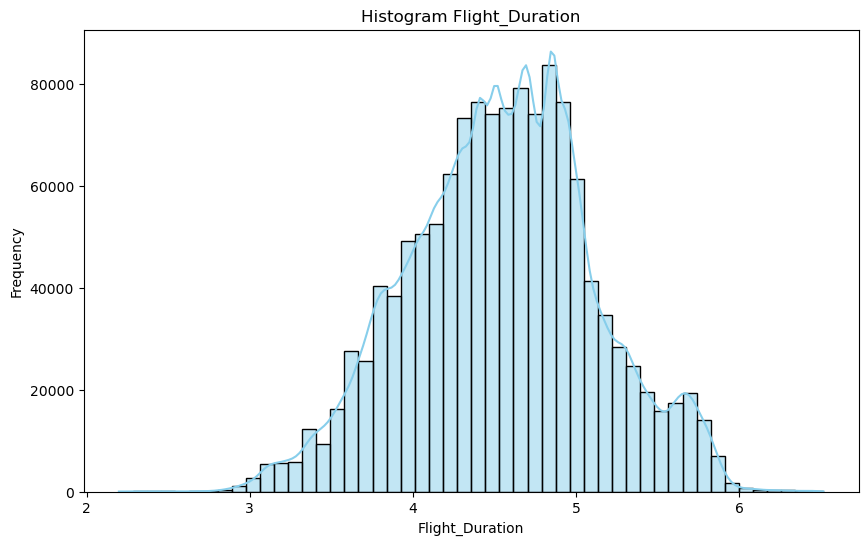

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Flight_Duration'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Flight_Duration')
plt.xlabel('Flight_Duration')
plt.ylabel('Frequency')
plt.show()

In [47]:
Data['Flight_Duration'].describe()

count    1.305061e+06
mean     4.544596e+00
std      5.699990e-01
min      2.197225e+00
25%      4.158883e+00
50%      4.564348e+00
75%      4.919981e+00
max      6.516193e+00
Name: Flight_Duration, dtype: float64

### 7. Flight_Distance
***Imputation***

In [43]:
Data['Flight_Distance'] = Data.groupby('Origin_Airport_ID')['Flight_Distance'].transform(lambda x: x.fillna(x.median()))

In [65]:
# from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer

# # Define the selected features for imputation including Flight_Duration
# selected_features_distance = [
#     'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
#     'Marketing_Airline_DOT_ID', 'Flight_Number', 'Origin_Airport_ID', 'Flight_Cancelled',
#     'Departure_Delay', 'Diverted_Airport_Landings', 'Taxi_Out_Time', 'Taxi_In_Time',
#     'Flight_Diverted', 'Flight_Duration', 'Origin_Temperature', 
#     'Destination_Temperature', 'Origin_Wind_Speed', 'Destination_Wind_Speed', 
#     'Origin_Precipitation', 'Destination_Precipitation'
# ]

# # Separate data into training and testing sets for Flight_Distance
# X_train_distance = Data[selected_features_distance].loc[Data['Flight_Distance'].notnull()]
# y_train_distance = Data['Flight_Distance'].dropna()
# X_test_distance = Data[selected_features_distance].loc[Data['Flight_Distance'].isnull()]

# # Initialize SimpleImputer to handle missing values
# imputer_distance = SimpleImputer()

# # Impute missing values for Flight_Distance
# X_train_imputed_distance = imputer_distance.fit_transform(X_train_distance)
# X_test_imputed_distance = imputer_distance.transform(X_test_distance)

# # Initialize and train the Linear Regression model for Flight_Distance
# imputation_regressor_distance = LinearRegression()
# imputation_regressor_distance.fit(X_train_imputed_distance, y_train_distance)

# # Predict missing values of Flight_Distance
# imputed_distances = imputation_regressor_distance.predict(X_test_imputed_distance)

# # Assign imputed values to the missing rows for Flight_Distance
# Data.loc[Data['Flight_Distance'].isnull(), 'Flight_Distance'] = imputed_distances

# # Check if there are any missing values remaining for Flight_Distance
# print("Remaining missing values after imputation for Flight_Distance:", Data['Flight_Distance'].isnull().sum())

Remaining missing values after imputation for Flight_Distance: 0


In [44]:
Data.Flight_Distance.isna().sum()       

0

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


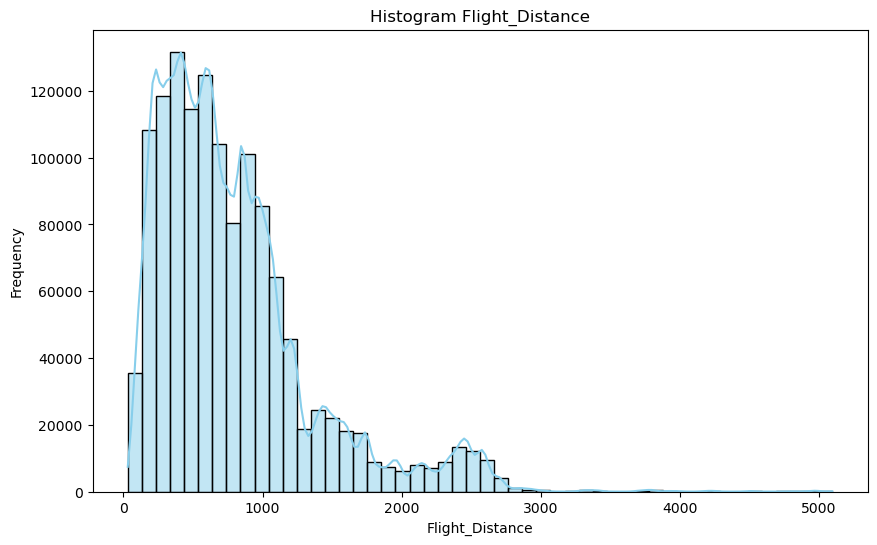

In [222]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Flight_Distance'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Flight_Distance')
plt.xlabel('Flight_Distance')
plt.ylabel('Frequency')
plt.show()

In [45]:
Data['Flight_Distance'] = np.log1p(Data['Flight_Distance'])

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


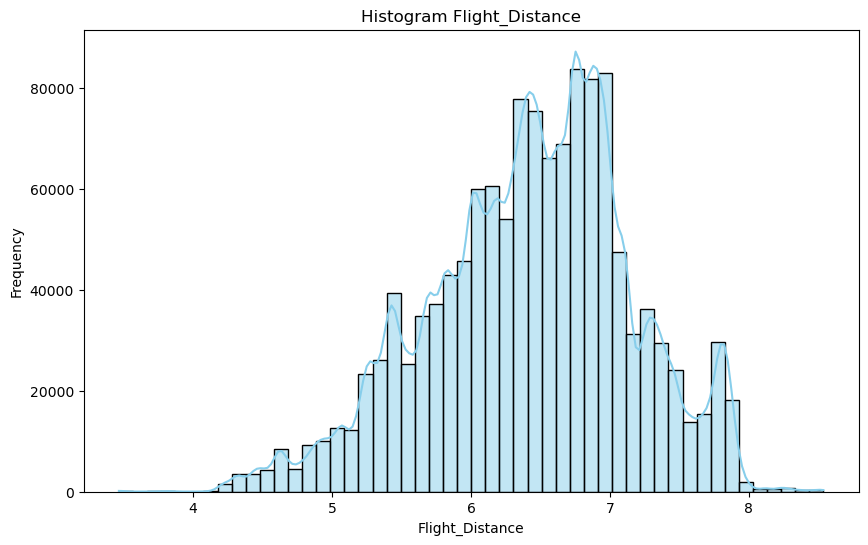

In [224]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Flight_Distance'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Flight_Distance')
plt.xlabel('Flight_Distance')
plt.ylabel('Frequency')
plt.show()

In [52]:
Data['Flight_Distance'].describe()

count    1.305061e+06
mean     6.424608e+00
std      7.312271e-01
min      3.465736e+00
25%      5.968708e+00
50%      6.478510e+00
75%      6.916715e+00
max      8.536211e+00
Name: Flight_Distance, dtype: float64

### 8. Origin_Temperature
***Imputaiton***

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


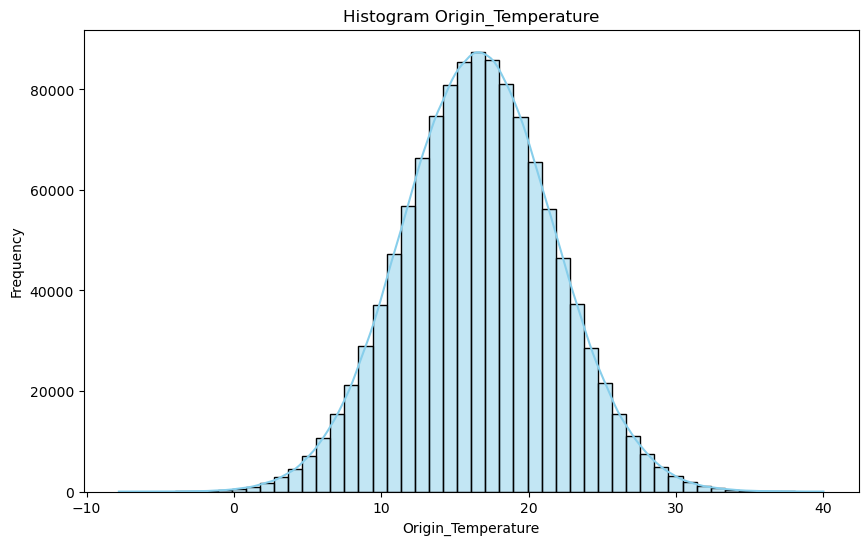

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Origin_Temperature'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Origin_Temperature')
plt.xlabel('Origin_Temperature')
plt.ylabel('Frequency')
plt.show()

In [230]:
Data['Origin_Temperature'].describe()

count    1.305061e+06
mean     1.658886e+01
std      4.879765e+00
min     -7.807180e+00
25%      1.354849e+01
50%      1.653464e+01
75%      1.960135e+01
max      4.000000e+01
Name: Origin_Temperature, dtype: float64

In [48]:
Data['Origin_Temperature'].isna().sum()

0

In [47]:
Data['Origin_Temperature'] = Data.groupby('Origin_Airport_ID')['Origin_Temperature'].transform(lambda x: x.fillna(x.mean()))

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


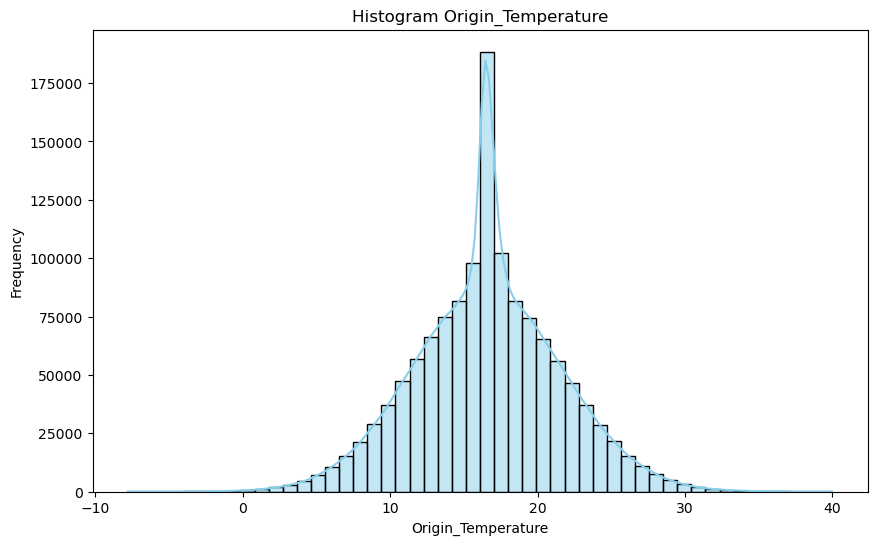

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Origin_Temperature'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Origin_Temperature')
plt.xlabel('Origin_Temperature')
plt.ylabel('Frequency')
plt.show()

In [36]:
# from sklearn.linear_model import LinearRegression
# from sklearn.impute import SimpleImputer

# # Define the selected features for imputation including Flight_Distance
# selected_features_temperature = [
#     'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
#     'Marketing_Airline_DOT_ID', 'Flight_Number', 'Flight_Cancelled',
#     'Departure_Delay', 'Diverted_Airport_Landings', 'Taxi_Out_Time', 'Taxi_In_Time',
#     'Flight_Diverted', 'Flight_Duration', 'Flight_Distance', 
#     'Destination_Temperature', 'Origin_Wind_Speed', 'Destination_Wind_Speed', 
#     'Origin_Precipitation', 'Destination_Precipitation'
# ]

# # Separate data into training and testing sets for Origin_Temperature
# X_train_temperature = Data[selected_features_temperature].loc[Data['Origin_Temperature'].notnull()]
# y_train_temperature = Data['Origin_Temperature'].dropna()
# X_test_temperature = Data[selected_features_temperature].loc[Data['Origin_Temperature'].isnull()]

# # Initialize SimpleImputer to handle missing values
# imputer_temperature = SimpleImputer()

# # Impute missing values for Origin_Temperature
# X_train_imputed_temperature = imputer_temperature.fit_transform(X_train_temperature)
# X_test_imputed_temperature = imputer_temperature.transform(X_test_temperature)

# # Initialize and train the Linear Regression model for Origin_Temperature
# imputation_regressor_temperature = LinearRegression()
# imputation_regressor_temperature.fit(X_train_imputed_temperature, y_train_temperature)

# # Predict missing values of Origin_Temperature
# imputed_temperatures = imputation_regressor_temperature.predict(X_test_imputed_temperature)

# # Assign imputed values to the missing rows for Origin_Temperature 
# Data.loc[Data['Origin_Temperature'].isnull(), 'Origin_Temperature'] = imputed_temperatures

# # Check if there are any missing values remaining for Origin_Temperature
# print("Remaining missing values after imputation for Origin_Temperature:", Data['Origin_Temperature'].isnull().sum())

Remaining missing values after imputation for Origin_Temperature: 0


### 9. Destination_Temperature
***Imputation***

In [254]:
Data.Destination_Temperature.isna().sum()

130740

In [236]:
Data.Destination_Temperature.describe()

count    1.305061e+06
mean     1.659437e+01
std      4.871590e+00
min     -8.314730e+00
25%      1.356678e+01
50%      1.657444e+01
75%      1.960585e+01
max      4.000000e+01
Name: Destination_Temperature, dtype: float64

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


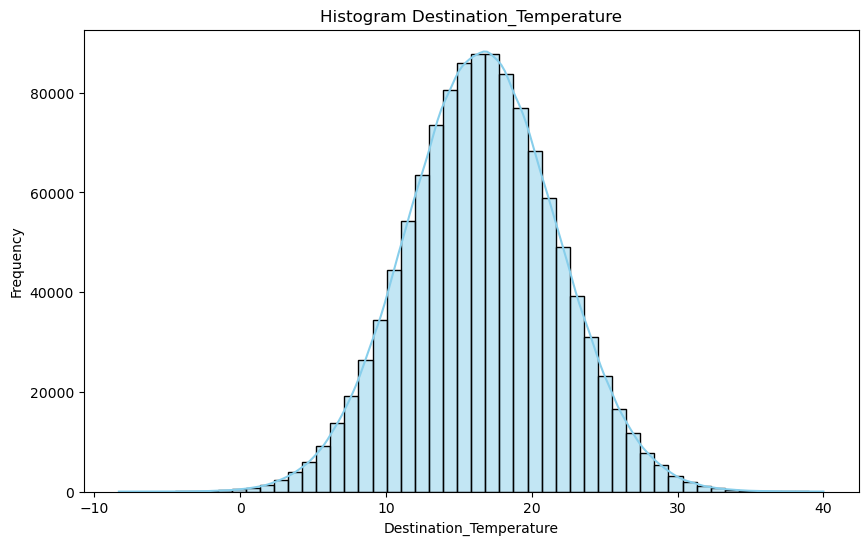

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Destination_Temperature'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Destination_Temperature')
plt.xlabel('Destination_Temperature')
plt.ylabel('Frequency')
plt.show()

In [49]:
Data['Destination_Temperature'] = Data.groupby('Scheduled_Arrival_Time')['Destination_Temperature'].transform(lambda x: x.fillna(x.mean()))

In [51]:
Data['Destination_Temperature'] = Data['Destination_Temperature'].fillna(Data['Destination_Temperature'].mean())

In [52]:
Data['Destination_Temperature'].isna().sum()

0

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


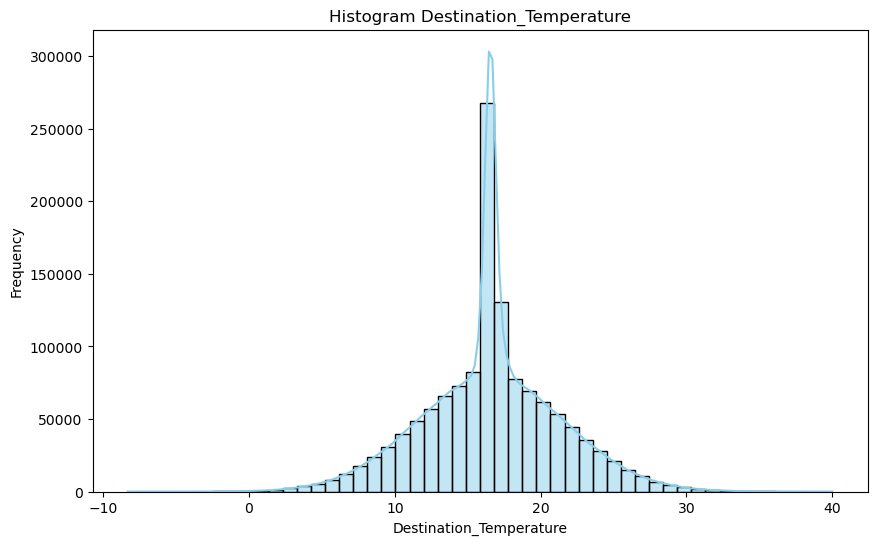

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Destination_Temperature'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Destination_Temperature')
plt.xlabel('Destination_Temperature')
plt.ylabel('Frequency')
plt.show()

In [140]:
Data['Destination_Temperature'].describe()

count    1.305061e+06
mean     1.659443e+01
std      4.621742e+00
min     -8.314730e+00
25%      1.402236e+01
50%      1.657682e+01
75%      1.914577e+01
max      4.000000e+01
Name: Destination_Temperature, dtype: float64

### 10. Origin_Wind_Speed
***Imputation***

In [142]:
Data.Origin_Wind_Speed.describe()

count    1.135886e+06
mean     2.007419e+01
std      4.304643e+00
min      1.721443e+00
25%      1.709085e+01
50%      1.986725e+01
75%      2.284598e+01
max      4.257717e+01
Name: Origin_Wind_Speed, dtype: float64

In [53]:
Data.Origin_Wind_Speed.isna().sum()

169175

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


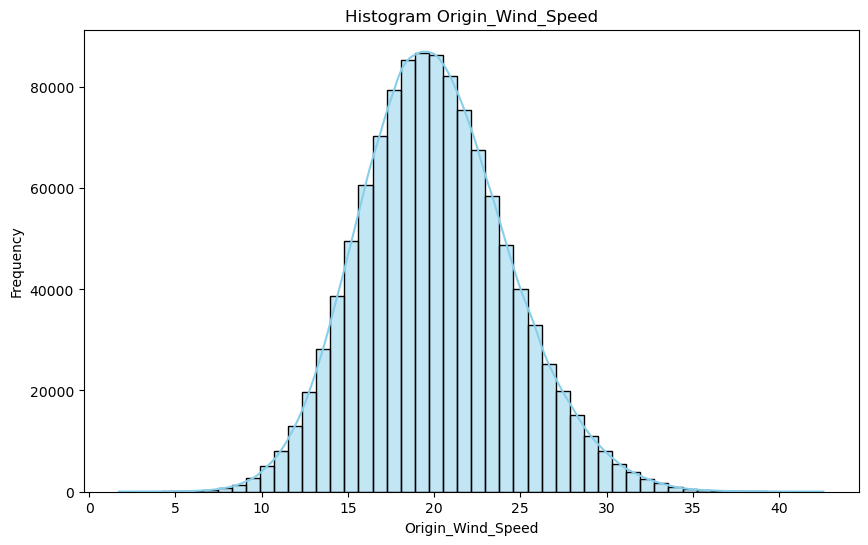

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Origin_Wind_Speed'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Origin_Wind_Speed')
plt.xlabel('Origin_Wind_Speed')
plt.ylabel('Frequency')
plt.show()

In [54]:
Data['Origin_Wind_Speed'] = Data.groupby('Origin_Airport_ID')['Origin_Wind_Speed'].transform(lambda x: x.fillna(x.mean()))

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


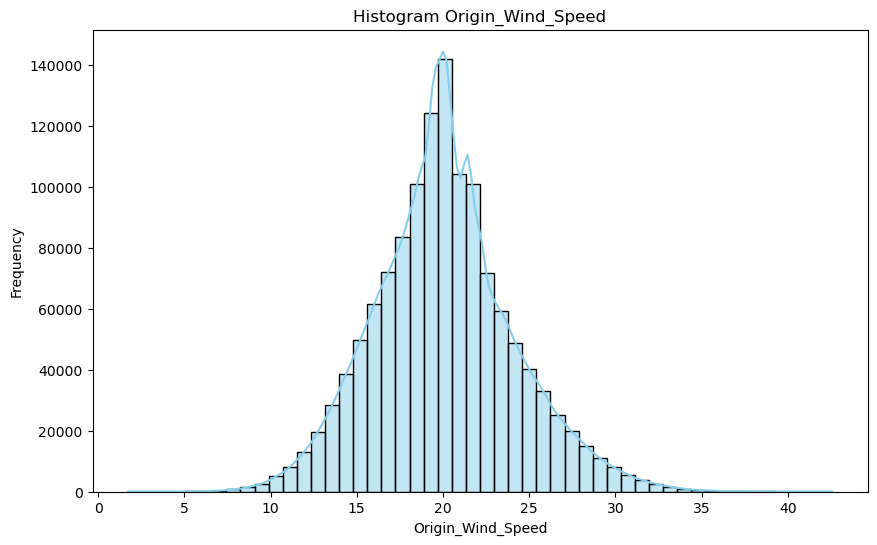

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Origin_Wind_Speed'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Origin_Wind_Speed')
plt.xlabel('Origin_Wind_Speed')
plt.ylabel('Frequency')
plt.show()

In [155]:
Data.Origin_Wind_Speed.describe()

count    1.305061e+06
mean     2.007460e+01
std      4.037962e+00
min      1.721443e+00
25%      1.750518e+01
50%      1.995082e+01
75%      2.234336e+01
max      4.257717e+01
Name: Origin_Wind_Speed, dtype: float64

### 11. Destination_Wind_Speed
***Imputation***

In [63]:
Data.Destination_Wind_Speed.describe()

count    1.135886e+06
mean     2.008301e+01
std      4.302374e+00
min      2.104595e+00
25%      1.709584e+01
50%      1.988182e+01
75%      2.285619e+01
max      4.276613e+01
Name: Destination_Wind_Speed, dtype: float64

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


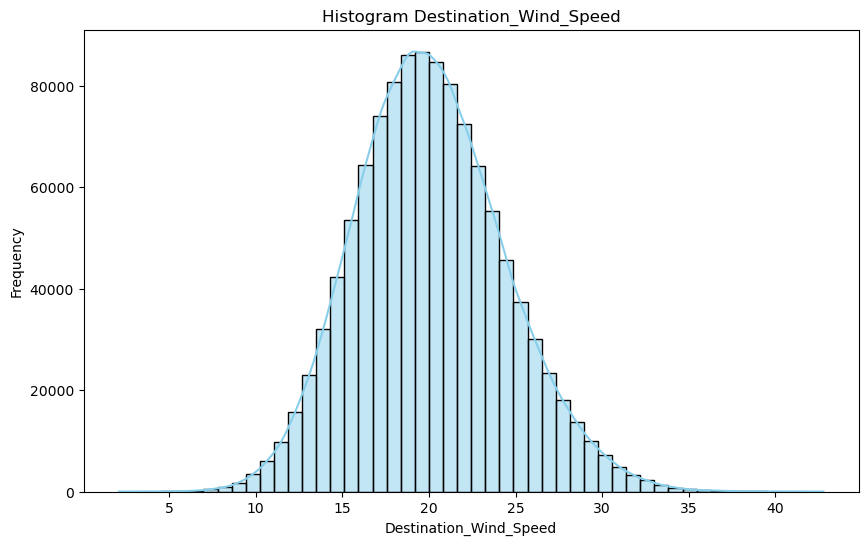

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Destination_Wind_Speed'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Destination_Wind_Speed')
plt.xlabel('Destination_Wind_Speed')
plt.ylabel('Frequency')
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Define the selected features for imputation including Origin_Temperature and Flight_Distance
selected_features_destination_wind_speed = [
    'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
    'Marketing_Airline_DOT_ID', 'Flight_Number', 'Origin_Airport_ID', 'Flight_Cancelled',
    'Departure_Delay', 'Diverted_Airport_Landings', 'Taxi_Out_Time', 'Taxi_In_Time',
    'Flight_Diverted', 'Flight_Duration', 'Flight_Distance', 'Origin_Temperature', 
    'Destination_Temperature', 'Origin_Wind_Speed', 'Destination_Wind_Speed', 
    'Origin_Precipitation', 'Destination_Precipitation'
]

# Separate data into training and testing sets for Destination_Wind_Speed
X_train_destination_wind_speed = Data[selected_features_destination_wind_speed].loc[Data['Destination_Wind_Speed'].notnull()]
y_train_destination_wind_speed = Data['Destination_Wind_Speed'].dropna()
X_test_destination_wind_speed = Data[selected_features_destination_wind_speed].loc[Data['Destination_Wind_Speed'].isnull()]

# Remove Destination_Wind_Speed from features for imputation
X_train_destination_wind_speed = X_train_destination_wind_speed.drop(columns=['Destination_Wind_Speed'])
X_test_destination_wind_speed = X_test_destination_wind_speed.drop(columns=['Destination_Wind_Speed'])

# Initialize SimpleImputer to handle missing values
imputer_destination_wind_speed = SimpleImputer()

# Impute missing values for Destination_Wind_Speed
X_train_imputed_destination_wind_speed = imputer_destination_wind_speed.fit_transform(X_train_destination_wind_speed)
X_test_imputed_destination_wind_speed = imputer_destination_wind_speed.transform(X_test_destination_wind_speed)

# Initialize and train the Linear Regression model for Destination_Wind_Speed
imputation_regressor_destination_wind_speed = LinearRegression()
imputation_regressor_destination_wind_speed.fit(X_train_imputed_destination_wind_speed, y_train_destination_wind_speed)

# Predict missing values of Destination_Wind_Speed
imputed_destination_wind_speeds = imputation_regressor_destination_wind_speed.predict(X_test_imputed_destination_wind_speed)

# Assign imputed values to the missing rows for Destination_Wind_Speed
Data.loc[Data['Destination_Wind_Speed'].isnull(), 'Destination_Wind_Speed'] = imputed_destination_wind_speeds

# Check if there are any missing values remaining for Destination_Wind_Speed
print("Remaining missing values after imputation for Destination_Wind_Speed:", Data['Destination_Wind_Speed'].isnull().sum())

Remaining missing values after imputation for Destination_Wind_Speed: 0


In [56]:
Data.Destination_Wind_Speed.isna().sum()

0

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


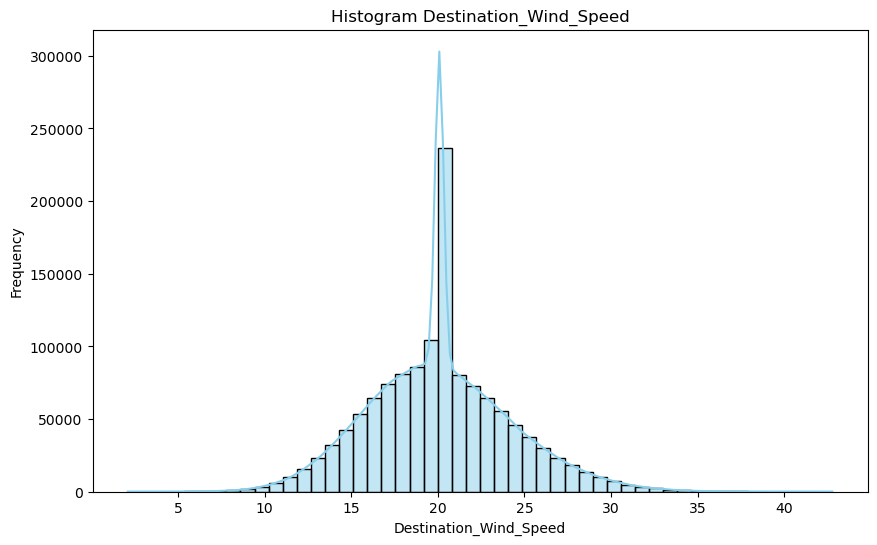

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Destination_Wind_Speed'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram Destination_Wind_Speed')
plt.xlabel('Destination_Wind_Speed')
plt.ylabel('Frequency')
plt.show()

In [244]:
Data.Destination_Wind_Speed.describe()

count    1.305061e+06
mean     2.009735e+01
std      4.052575e+00
min      2.104595e+00
25%      1.746655e+01
50%      1.999101e+01
75%      2.241122e+01
max      4.276613e+01
Name: Destination_Wind_Speed, dtype: float64

### 12. Arrival_State and Departure_State
***Encoding***

In [57]:
Data = pd.get_dummies(Data, columns=['Arrival_State', 'Departure_State'])

In [58]:
Data_y_train = Data_y_train.fillna(Data_y_train.median())

# Check if there are any missing values remaining
missing_values_count = Data_y_train.isnull().sum().sum()
print("Remaining missing values after imputation:", missing_values_count)


Remaining missing values after imputation: 0


### Feature Engineering for the Test Data

### 1. Actual_Departure_Time
***Imputation***

In [59]:
import pandas as pd

# Group by Scheduled_Departure_Time and calculate the mean of Actual_Departure_Time for each group
mean_by_Scheduled_Departure_Time = Data_X_test.groupby('Scheduled_Departure_Time')['Actual_Departure_Time'].median()

# Impute missing values based on the mean of each group
missing_mask = Data_X_test['Actual_Departure_Time'].isnull()
Data_X_test.loc[missing_mask, 'Actual_Departure_Time'] = Data_X_test.loc[missing_mask, 'Scheduled_Departure_Time'].map(mean_by_Scheduled_Departure_Time)

# Check if there are any missing values left
missing_values_count = Data_X_test['Actual_Departure_Time'].isnull().sum()
print("Number of missing values after imputation:", missing_values_count)

Number of missing values after imputation: 0


### 2. Marketing_Airline
***Imputation***

In [62]:
Data_X_test.Marketing_Airline.isna().sum()

0

In [61]:
Data_X_test['Original_Index'] = Data_X_test.index
Data_X_test = Data_X_test.groupby('Marketing_Airline_DOT_ID', group_keys=False).apply(
    lambda group: group.fillna({'Marketing_Airline': group['Marketing_Airline'].mode()[0]})
)

# Sort by the index column to restore the original ordera
Data_X_test = Data_X_test.sort_values('Original_Index').reset_index(drop=True)

# Drop the index column
Data_X_test = Data_X_test.drop(columns=['Original_Index'])

#### ***Encoding***

In [63]:
# Perform one-hot encoding on 'Marketing_Airline' column
Data_X_test = pd.get_dummies(Data_X_test, columns=['Marketing_Airline'], drop_first=True)

### 3. Departure_Delay
***Imputation***

In [66]:
Data_X_test.Departure_Delay.isna().sum()

0

In [65]:
import pandas as pd

# Convert time to minutes
def time_to_minutes(time):
    hours = time // 100
    minutes = time % 100
    return hours * 60 + minutes

# Calculate Departure_Delay
def calculate_departure_delay(df):
    # Ensure both Actual_Departure_Time and Scheduled_Departure_Time are present
    mask = df['Actual_Departure_Time'].notna() & df['Scheduled_Departure_Time'].notna()
    
    # Apply conversion and subtraction to calculate delay
    df.loc[mask, 'Departure_Delay'] = (
        time_to_minutes(df.loc[mask, 'Actual_Departure_Time'].astype(int)) -
        time_to_minutes(df.loc[mask, 'Scheduled_Departure_Time'].astype(int))
    )
    
    return df

# Apply the function to Data DataFrame
Data_X_test = calculate_departure_delay(Data_X_test)

In [79]:
Data_X_test.Departure_Delay.describe()

count    326266.000000
mean          4.681769
std          97.896088
min       -1438.000000
25%          -5.000000
50%          -2.000000
75%           9.000000
max        1437.000000
Name: Departure_Delay, dtype: float64

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


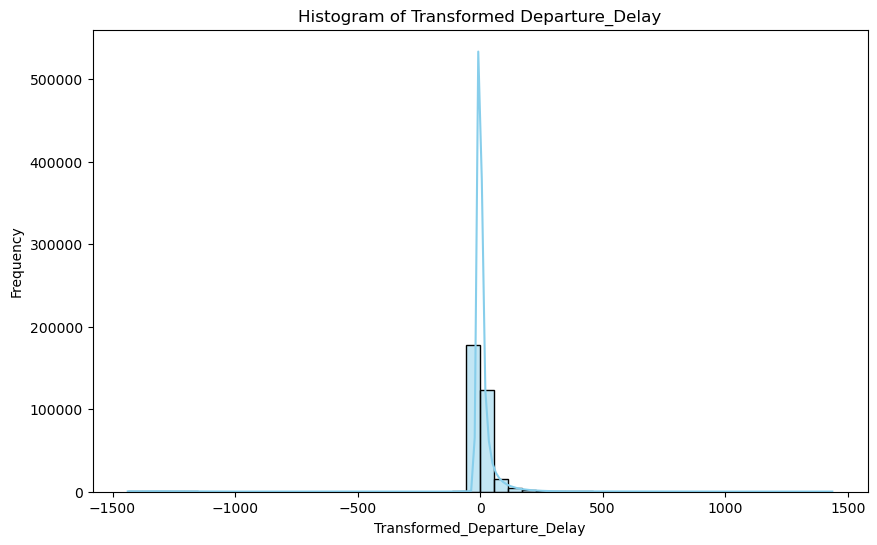

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Departure_Delay'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Transformed Departure_Delay')
plt.xlabel('Transformed_Departure_Delay')
plt.ylabel('Frequency')
plt.show()

In [67]:
import numpy as np
departure_delay = Data_X_test['Departure_Delay']
# Apply log transformation
transformed_data = np.log(departure_delay - departure_delay.min() + 1)  # Adding 1 to ensure non-zero values
Data_X_test['Departure_Delay'] = transformed_data

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


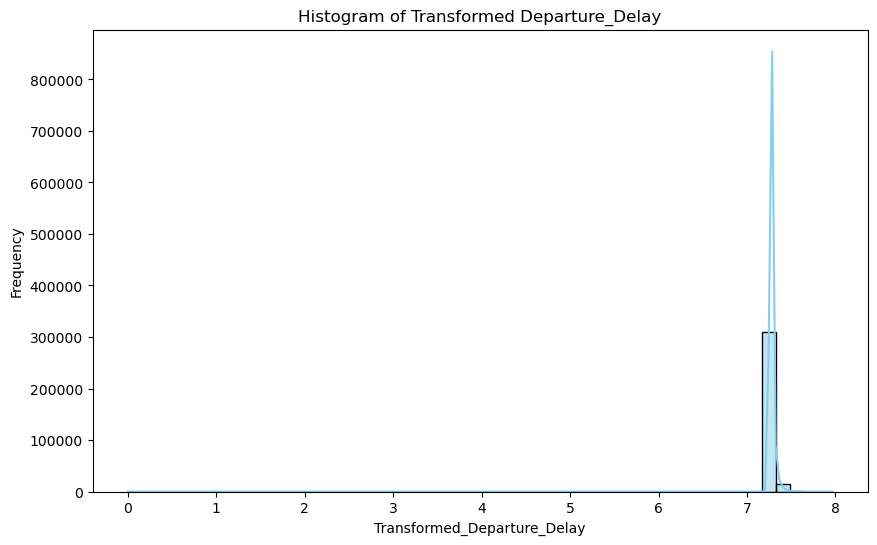

In [263]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Departure_Delay'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Transformed Departure_Delay')
plt.xlabel('Transformed_Departure_Delay')
plt.ylabel('Frequency')
plt.show()

In [68]:
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    
    # Count outliers
    num_outliers = outliers.sum()
    
    return num_outliers

# Assuming 'Data' is your DataFrame and 'Feature_Column' is the column you want to detect outliers in
num_outliers = count_outliers_iqr(Data_X_test['Departure_Delay'])
print("Number of outliers:", num_outliers)

Number of outliers: 43978


In [69]:
import numpy as np

def remove_outliers_iqr(transformed_data):
    Q1 = np.percentile(transformed_data, 25)
    Q3 = np.percentile(transformed_data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Replace outliers with boundary values
    transformed_data[transformed_data < lower_bound] = lower_bound
    transformed_data[transformed_data > upper_bound] = upper_bound
    
    return transformed_data

In [70]:
transformed_data = Data_X_test['Departure_Delay']
cleaned_transformed_data = remove_outliers_iqr(transformed_data)
Data_X_test['Departure_Delay'] = cleaned_transformed_data

C:\Users\asus\AppData\Local\Temp\ipykernel_13468\4041703645.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data[transformed_data < lower_bound] = lower_bound
C:\Users\asus\AppData\Local\Temp\ipykernel_13468\4041703645.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transformed_data[transformed_data > upper_bound] = upper_bound


In [85]:
Data_X_test.Departure_Delay.describe()

count    326266.000000
mean          7.274140
std           0.009153
min           7.253650
25%           7.268223
50%           7.270313
75%           7.277939
max           7.292512
Name: Departure_Delay, dtype: float64

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


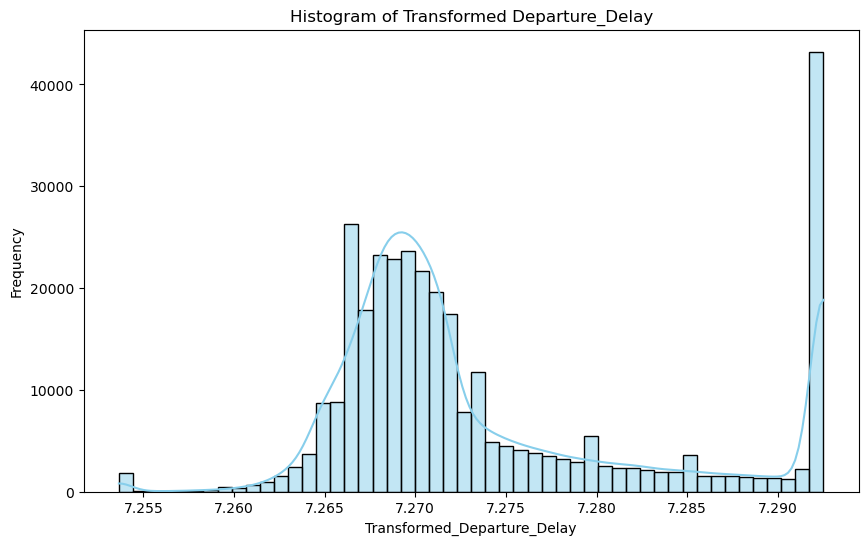

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Departure_Delay'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Transformed Departure_Delay')
plt.xlabel('Transformed_Departure_Delay')
plt.ylabel('Frequency')
plt.show()

### 4. Taxi_Out_Time
***Imputation***

In [74]:
Data_X_test.Taxi_Out_Time.isna().sum()

0

In [73]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Select relevant features
relevant_features = ['Origin_Airport_ID', 'Taxi_Out_Time']

# Group by 'Origin_Airport_ID' and impute missing values of 'Taxi_Out_Time' by median within each group
grouped = Data_X_test.groupby(['Origin_Airport_ID'])
imputer = SimpleImputer(strategy='median') # median

# Impute missing values for 'Taxi_Out_Time' within each group
Data_X_test['Taxi_Out_Time'] = grouped['Taxi_Out_Time'].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten())

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


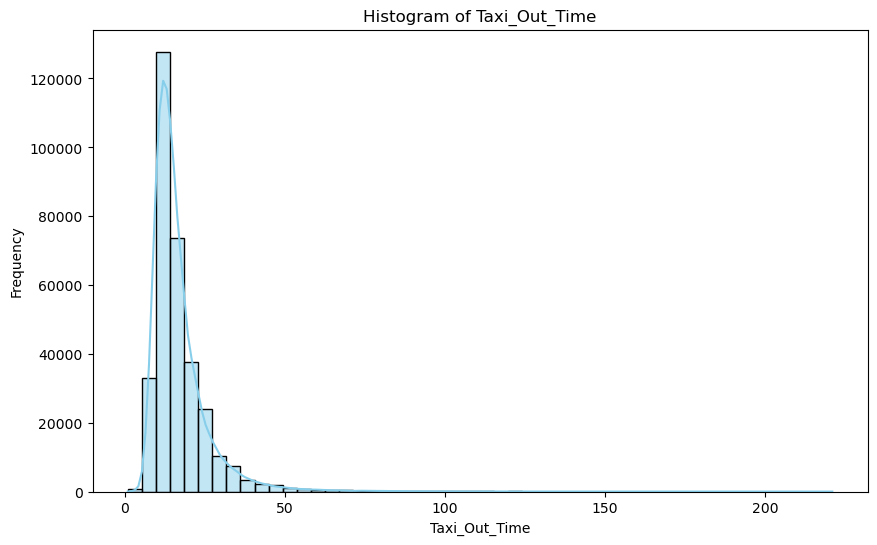

In [273]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Taxi_Out_Time'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Taxi_Out_Time')
plt.xlabel('Taxi_Out_Time')
plt.ylabel('Frequency')
plt.show()

In [89]:
Data_X_test.Taxi_Out_Time.describe()

count    326266.000000
mean         16.903933
std           9.292954
min           1.000000
25%          11.000000
50%          15.000000
75%          19.000000
max         221.000000
Name: Taxi_Out_Time, dtype: float64

In [76]:
# Adding a small constant to avoid zero or negative values
Data_X_test['Taxi_Out_Time'] += 1e-6  # Adding a small constant like 1e-6

# Transformation
Data_X_test['Taxi_Out_Time'] = np.log(Data_X_test['Taxi_Out_Time'])  # Log transformation

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


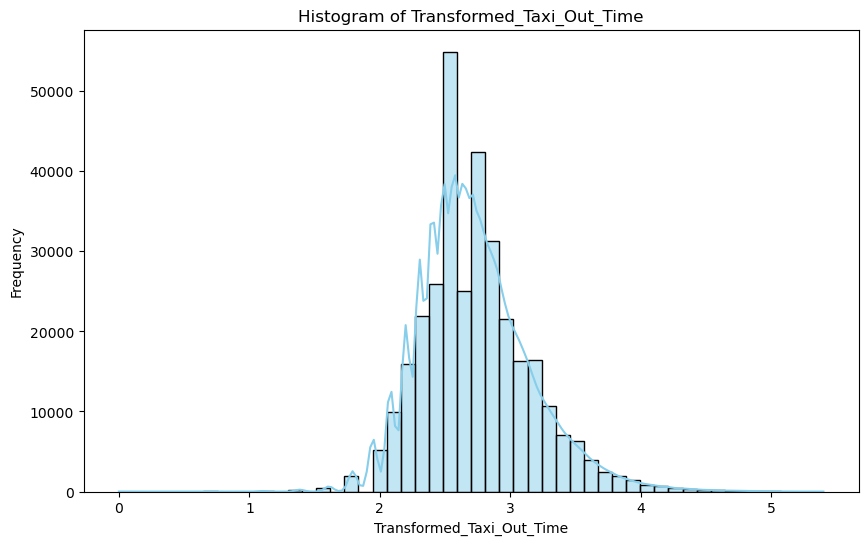

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Taxi_Out_Time'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Transformed_Taxi_Out_Time')
plt.xlabel('Transformed_Taxi_Out_Time')
plt.ylabel('Frequency')
plt.show()

In [91]:
Data_X_test.Taxi_Out_Time.describe()

count    3.262660e+05
mean     2.726657e+00
std      4.240906e-01
min      9.999995e-07
25%      2.397895e+00
50%      2.708050e+00
75%      2.944439e+00
max      5.398163e+00
Name: Taxi_Out_Time, dtype: float64

### 5. Taxi_In_Time
***Imputation***

In [280]:
Data_X_test.Taxi_In_Time.isna().sum()

10031

In [78]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Select relevant features
relevant_features = ['Marketing_Airline_DOT_ID', 'Taxi_In_Time']

# Group by 'Destination_Airport_ID' and impute missing values of 'Taxi_In_Time' by median within each group
grouped = Data_X_test.groupby(['Marketing_Airline_DOT_ID'])
imputer = SimpleImputer(strategy='median')

# Impute missing values for 'Taxi_In_Time' within each group
Data_X_test['Taxi_In_Time'] = grouped['Taxi_In_Time'].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten())


C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


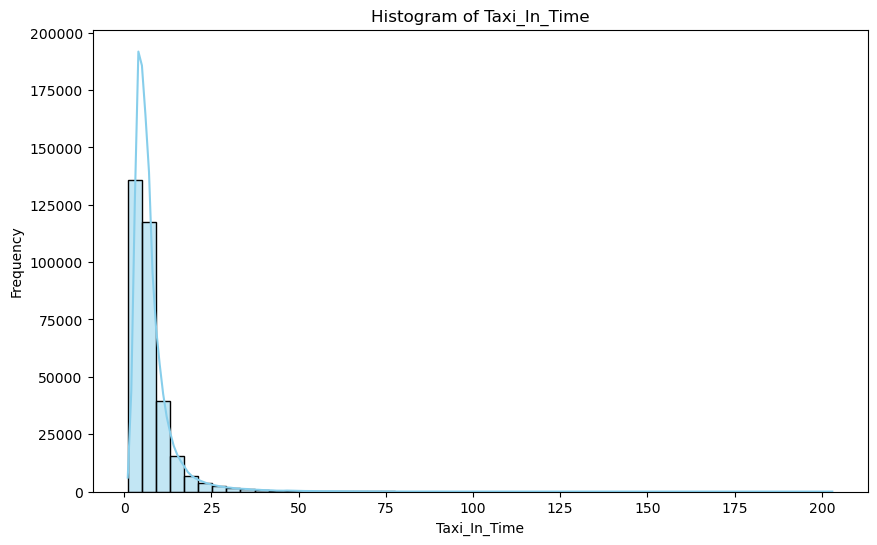

In [288]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Taxi_In_Time'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Taxi_In_Time')
plt.xlabel('Taxi_In_Time')
plt.ylabel('Frequency')
plt.show()

In [95]:
Data_X_test.Taxi_In_Time.describe()

count    326266.000000
mean          7.850395
std           6.601554
min           1.000000
25%           4.000000
50%           6.000000
75%           9.000000
max         203.000000
Name: Taxi_In_Time, dtype: float64

#### ***Log Transformation***

In [81]:
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    
    # Count outliers
    num_outliers = outliers.sum()
    
    return num_outliers

# Assuming 'Data' is your DataFrame and 'Feature_Column' is the column you want to detect outliers in
num_outliers = count_outliers_iqr(Data_X_test['Taxi_In_Time'])
print("Number of outliers:", num_outliers)

Number of outliers: 6176


In [80]:
Data_X_test['Taxi_In_Time'] = np.log(Data_X_test['Taxi_In_Time'] + 1)  # Adding 1 to handle zero values

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


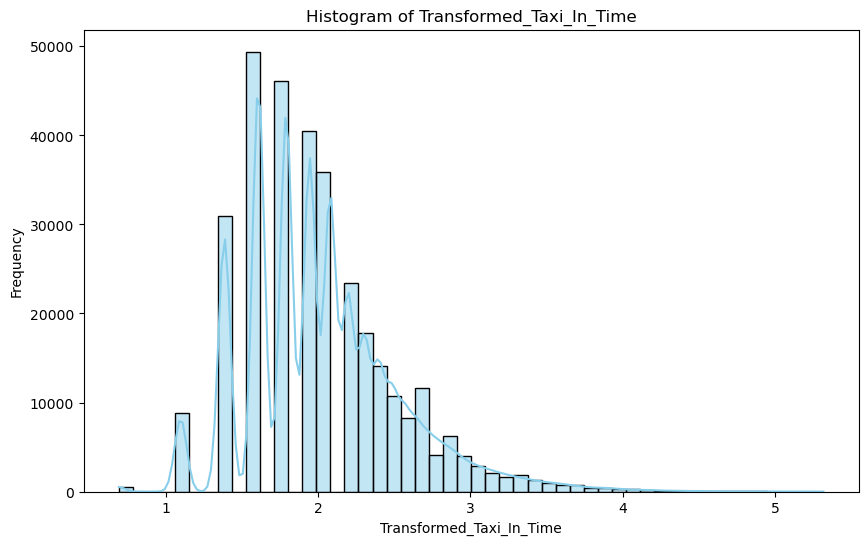

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Taxi_In_Time'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Transformed_Taxi_In_Time')
plt.xlabel('Transformed_Taxi_In_Time')
plt.ylabel('Frequency')
plt.show()

In [82]:
Data_X_test['Taxi_In_Time'].describe()

count    326266.000000
mean          2.028152
std           0.507414
min           0.693147
25%           1.609438
50%           1.945910
75%           2.302585
max           5.318120
Name: Taxi_In_Time, dtype: float64

### 6. Flight_Duration
***Imputation***

In [83]:
Data_X_test.Flight_Duration.isna().sum()

42315

In [84]:
from sklearn.impute import SimpleImputer

# Group by 'Flight_Distance' and impute missing values of 'Flight_Duration' by mean within each group
grouped = Data_X_test.groupby(['Origin_Airport_ID'])
imputer = SimpleImputer(strategy='median')

# Impute missing values for 'Flight_Duration' within each group
Data_X_test['Flight_Duration'] = grouped['Flight_Duration'].transform(lambda x: imputer.fit_transform(x.values.reshape(-1, 1)).flatten())

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


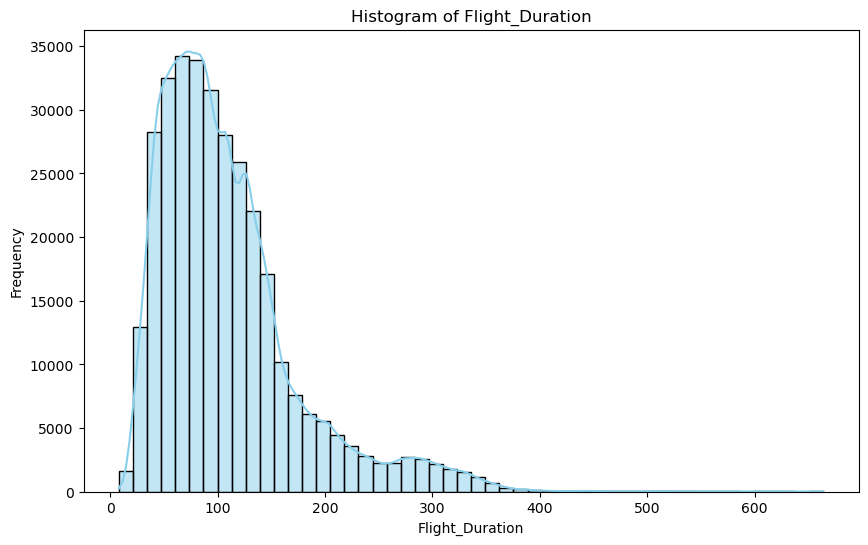

In [303]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Flight_Duration'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Flight_Duration')
plt.xlabel('Flight_Duration')
plt.ylabel('Frequency')
plt.show()

In [304]:
Data_X_test.Flight_Duration.describe()

count    326266.000000
mean        109.547156
std          66.382769
min           8.000000
25%          63.000000
50%          94.000000
75%         136.000000
max         664.000000
Name: Flight_Duration, dtype: float64

In [85]:
Data_X_test['Flight_Duration'] = np.log1p(Data_X_test['Flight_Duration']) 

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


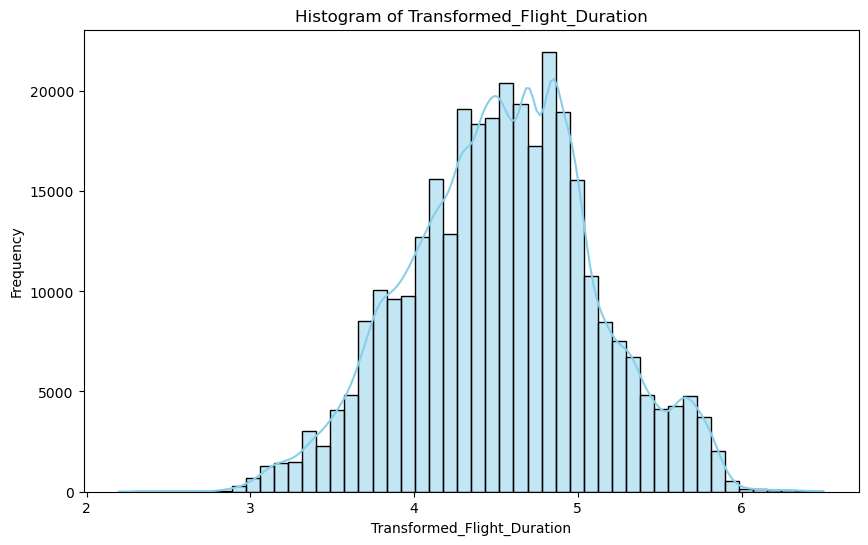

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Flight_Duration'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Transformed_Flight_Duration')
plt.xlabel('Transformed_Flight_Duration')
plt.ylabel('Frequency')
plt.show()

In [104]:
Data_X_test.Flight_Duration.describe()

count    326266.000000
mean          4.544732
std           0.569853
min           2.197225
25%           4.158883
50%           4.553877
75%           4.919981
max           6.499787
Name: Flight_Duration, dtype: float64

### 7. Flight_Distance
***Imputation***

In [88]:
Data_X_test.Flight_Distance.isna().sum()

0

In [87]:
Data_X_test['Flight_Distance'] = Data_X_test.groupby('Origin_Airport_ID')['Flight_Distance'].transform(lambda x: x.fillna(x.median()))

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


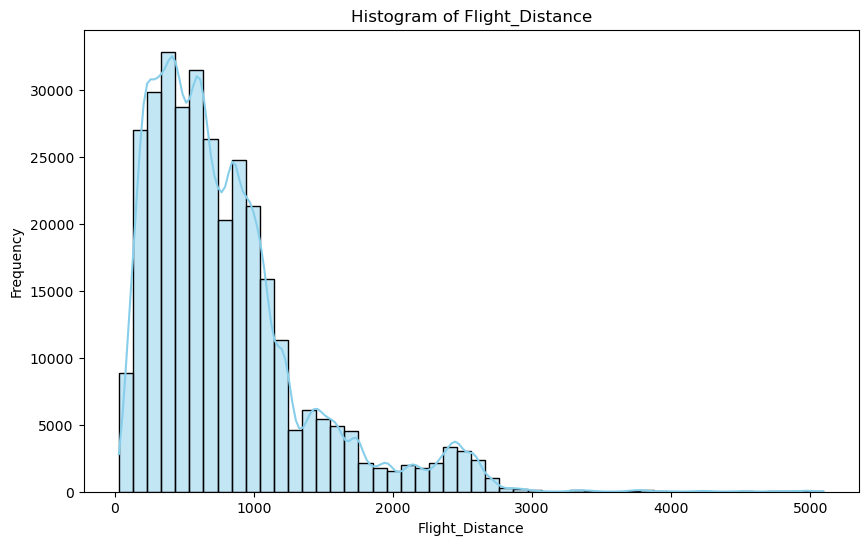

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Flight_Distance'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Flight_Distance')
plt.xlabel('Flight_Distance')
plt.ylabel('Frequency')
plt.show()

In [314]:
Data_X_test.Flight_Distance.describe()

count    326266.000000
mean        788.984784
std         569.047605
min          31.000000
25%         390.000000
50%         648.000000
75%        1005.000000
max        5095.000000
Name: Flight_Distance, dtype: float64

#### ***Log Transformation***

In [89]:
Data_X_test['Flight_Distance'] = np.log1p(Data_X_test['Flight_Distance'])

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


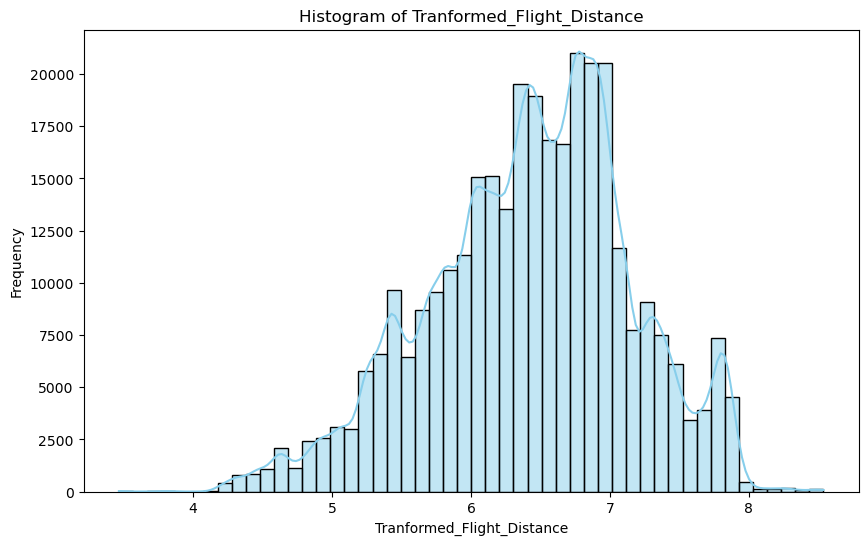

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_X_test['Flight_Distance'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of Tranformed_Flight_Distance')
plt.xlabel('Tranformed_Flight_Distance')
plt.ylabel('Frequency')
plt.show()

In [109]:
Data_X_test.Flight_Distance.describe()

count    326266.000000
mean          6.424934
std           0.731218
min           3.465736
25%           5.968708
50%           6.475433
75%           6.913737
max           8.536211
Name: Flight_Distance, dtype: float64

### 8. Origin_Temperature
***Imputation***

In [92]:
Data_X_test.Origin_Temperature.isna().sum()

0

In [91]:
Data_X_test['Origin_Temperature'] = Data_X_test.groupby('Origin_Airport_ID')['Origin_Temperature'].transform(lambda x: x.fillna(x.mean()))

### 9. Destination_Temperature
***Imputation***

In [93]:
Data_X_test.Destination_Temperature.isna().sum()

32450

In [94]:
Data_X_test['Destination_Temperature'] = Data_X_test.groupby('Scheduled_Arrival_Time')['Destination_Temperature'].transform(lambda x: x.fillna(x.mean()))

In [95]:
Data_X_test['Destination_Temperature'] = Data_X_test['Destination_Temperature'].fillna(Data_X_test['Destination_Temperature'].mean())

### 10. Origin_Wind_Speed
***Imputation***

In [97]:
Data_X_test.Origin_Wind_Speed.isna().sum()

0

In [96]:
Data_X_test['Origin_Wind_Speed'] = Data_X_test.groupby('Origin_Airport_ID')['Origin_Wind_Speed'].transform(lambda x: x.fillna(x.mean()))

### 11. Destination_Wind_Speed
***Imputation***

In [299]:
Data_X_test.Destination_Wind_Speed.isna().sum()

42315

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

# Define the selected features for imputation including Origin_Temperature and Flight_Distance
selected_features_destination_wind_speed = [
    'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time', 'Scheduled_Arrival_Time',
    'Marketing_Airline_DOT_ID', 'Flight_Number', 'Origin_Airport_ID', 'Flight_Cancelled',
    'Departure_Delay', 'Diverted_Airport_Landings', 'Taxi_Out_Time', 'Taxi_In_Time',
    'Flight_Diverted', 'Flight_Duration', 'Flight_Distance', 'Origin_Temperature', 
    'Destination_Temperature', 'Origin_Wind_Speed', 'Destination_Wind_Speed', 
    'Origin_Precipitation', 'Destination_Precipitation'
]

# Separate data into training and testing sets for Destination_Wind_Speed
X_train_destination_wind_speed = Data_X_test[selected_features_destination_wind_speed].loc[Data_X_test['Destination_Wind_Speed'].notnull()]
y_train_destination_wind_speed = Data_X_test['Destination_Wind_Speed'].dropna()
X_test_destination_wind_speed = Data_X_test[selected_features_destination_wind_speed].loc[Data_X_test['Destination_Wind_Speed'].isnull()]

# Remove Destination_Wind_Speed from features for imputation
X_train_destination_wind_speed = X_train_destination_wind_speed.drop(columns=['Destination_Wind_Speed'])
X_test_destination_wind_speed = X_test_destination_wind_speed.drop(columns=['Destination_Wind_Speed'])

# Initialize SimpleImputer to handle missing values
imputer_destination_wind_speed = SimpleImputer()

# Impute missing values for Destination_Wind_Speed
X_train_imputed_destination_wind_speed = imputer_destination_wind_speed.fit_transform(X_train_destination_wind_speed)
X_test_imputed_destination_wind_speed = imputer_destination_wind_speed.transform(X_test_destination_wind_speed)

# Initialize and train the Linear Regression model for Destination_Wind_Speed
imputation_regressor_destination_wind_speed = LinearRegression()
imputation_regressor_destination_wind_speed.fit(X_train_imputed_destination_wind_speed, y_train_destination_wind_speed)

# Predict missing values of Destination_Wind_Speed
imputed_destination_wind_speeds = imputation_regressor_destination_wind_speed.predict(X_test_imputed_destination_wind_speed)

# Assign imputed values to the missing rows for Destination_Wind_Speed
Data_X_test.loc[Data_X_test['Destination_Wind_Speed'].isnull(), 'Destination_Wind_Speed'] = imputed_destination_wind_speeds

# Check if there are any missing values remaining for Destination_Wind_Speed
print("Remaining missing values after imputation for Destination_Wind_Speed:", Data_X_test['Destination_Wind_Speed'].isnull().sum())

Remaining missing values after imputation for Destination_Wind_Speed: 0


### 12. Arrival_State , Departure_State
***Encoding***

In [99]:
Data_X_test = pd.get_dummies(Data_X_test, columns=['Arrival_State', 'Departure_State'])

In [157]:
pd.set_option('display.max_columns', None)
Data_X_test.head()

Weekday  Month_of_Year  Day_of_Month  Scheduled_Departure_Time  \
0        3              1             5                  0.823366   
1        2              4             5                  0.392211   
2        2              6            21                  0.260083   
3        3              6            29                  0.913769   
4        6              7            16                  0.663421   

   Scheduled_Arrival_Time  Flight_Cancelled  Departure_Delay  \
0                0.872045             False         7.271704   
1                0.517385             False         7.275865   
2                0.321280             False         7.267525   
3                0.997218             False         7.292512   
4                0.757302             False         7.277248   

   Diverted_Airport_Landings  Taxi_Out_Time  Taxi_In_Time  Flight_Diverted  \
0                          0       3.526361      1.791759            False   
1                          0       2.079442      1.945910            False   
2                          0       2.564949      2.639057            False   
3                          0       2.708050      1.386294            False   
4                          0       2.302585      1.791759            False   

   Actual_Departure_Time  Flight_Duration  Flight_Distance  \
0               0.822794         3.610918         4.787492   
1               0.396108         4.624973         6.448889   
2               0.255733         4.143135         6.008813   
3               0.993051         4.382027         6.327044   
4               0.668520         4.727388         6.746412   

   Origin_Temperature  Destination_Temperature  Origin_Wind_Speed  \
0           17.816202                13.967273          21.606228   
1           16.579017                16.521421          22.054403   
2           12.841426                20.008381          14.962407   
3           16.339309                16.677049          17.971479   
4           22.338361                 9.111698          21.214441   

   Destination_Wind_Speed  Origin_Precipitation  Destination_Precipitation  \
0               17.976362                   0.0                        0.1   
1               17.112589                   0.0                        1.0   
2               25.359331                   0.0                        0.1   
3               26.122293                   0.1                        0.0   
4               21.875593                   0.5                        1.0   

   Marketing_Airline_AS  Marketing_Airline_B6  Marketing_Airline_DL  \
0                 False                 False                  True   
1                 False                 False                 False   
2                 False                 False                  True   
3                 False                 False                 False   
4                 False                 False                 False   

   Marketing_Airline_F9  Marketing_Airline_G4  Marketing_Airline_HA  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   Marketing_Airline_NK  Marketing_Airline_UA  Marketing_Airline_WN  \
0                 False                 False                 False   
1                 False                 False                  True   
2                 False                 False                 False   
3                 False                 False                  True   
4                 False                 False                  True   

   Arrival_State_AK  Arrival_State_AL  Arrival_State_AR  Arrival_State_AZ  \
0             False             False             False             False   
1             False             False     

In [413]:
pd.set_option('display.max_columns', None)
Data.head()

Weekday  Month_of_Year  Day_of_Month  Scheduled_Departure_Time  \
0        6              6            25                  0.515299   
1        2              6            21                  0.511127   
2        2              3            22                  0.291377   
3        4              7            14                  0.896384   
4        1              5            30                  0.326147   

   Scheduled_Arrival_Time  Flight_Cancelled  Departure_Delay  \
0                0.614047             False         7.273093   
1                0.544506             False         7.271704   
2                0.391516             False         7.270313   
3                1.000000             False         7.273786   
4                0.385257             False         7.270313   

   Diverted_Airport_Landings  Taxi_Out_Time  Taxi_In_Time  Flight_Diverted  \
0                          0       0.019590      2.397895            False   
1                          0       0.019590      1.791759            False   
2                          0      -0.181481      2.484907            False   
3                          0       0.133471      2.079442            False   
4                          0      -0.181481      1.791759            False   

   Actual_Departure_Time  Flight_Duration  Flight_Distance  \
0               0.165003         4.682131         2.032695   
1               0.163229         3.178054         1.742137   
2               0.547350         4.836282         2.010170   
3               0.286760         4.875197         2.049780   
4               0.667110         4.077537         1.950966   

   Origin_Temperature  Destination_Temperature  Origin_Wind_Speed  \
0           25.140220                19.357739          21.019808   
1           13.279939                20.470690          18.045064   
2           24.562566                14.509228          24.946489   
3            8.817992                10.866812          17.426336   
4            9.360464                15.977111          19.001179   

   Destination_Wind_Speed  Origin_Precipitation  Destination_Precipitation  \
0               15.452723                   0.0                        0.0   
1               12.910265                   0.0                        0.0   
2               22.630553                   0.0                        0.0   
3               17.401007                   0.0                        0.0   
4               16.884960                   0.0                        0.0   

   Marketing_Airline_AS  Marketing_Airline_B6  Marketing_Airline_DL  \
0                 False                  True                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                  True                 False                 False   
4                 False                 False                 False   

   Marketing_Airline_F9  Marketing_Airline_G4  Marketing_Airline_HA  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                 False   

   Marketing_Airline_NK  Marketing_Airline_UA  Marketing_Airline_WN  \
0                 False                 False                 False   
1                 False                 False                 False   
2                 False                 False                 False   
3                 False                 False                 False   
4                 False                 False                  True   

   Arrival_State_AK  Arrival_State_AL  Arrival_State_AR  Arrival_State_AZ  \
0             False             False             False             False   
1             False             False     

In [100]:
# Impute missing values in Destination_Airport_ID with the mode
Data['Destination_Airport_ID'].fillna(Data['Destination_Airport_ID'].mode()[0], inplace=True)

In [101]:
# Impute missing values in Destination_Airport_ID with the mode
Data_X_test['Destination_Airport_ID'].fillna(Data_X_test['Destination_Airport_ID'].mode()[0], inplace=True)

In [342]:
# columns_to_drop = [
#     "Flight_Number",
#     "Marketing_Airline_DOT_ID",
#     "Origin_Airport_ID",
#     "Destination_Airport_ID"
# ]
# # Dropping the columns
# Data_X_test.drop(columns=columns_to_drop, inplace=True)

In [345]:
# columns_to_drop = [
#     "Flight_Number",
#     "Marketing_Airline_DOT_ID",
#     "Origin_Airport_ID",
#     "Destination_Airport_ID"
# ]
# # Dropping the columns
# Data.drop(columns=columns_to_drop, inplace=True)

In [102]:
def get_non_common_features(train_df, test_df):
    train_features = set(train_df.columns)
    test_features = set(test_df.columns)
    non_common_features = train_features.symmetric_difference(test_features)
    return list(non_common_features)

# Example usage:
non_common_features = get_non_common_features(Data, Data_X_test)
print("Non-common features:", non_common_features)


Non-common features: ['Arrival_State_DE']


In [103]:
Data_X_test['Arrival_State_DE'] = 0

In [104]:
# Check if the column names are the same in both Data_train and Data_test
if list(Data.columns) == list(Data_X_test.columns):
    print("The order of features is the same in Data_train and Data_test.")
else:
    print("The order of features is different in Data_train and Data_test.")


The order of features is different in Data_train and Data_test.


In [105]:
# Rearrange columns of Data_test to match the order of columns in Data_train
Data_X_test = Data_X_test[Data.columns]

In [106]:
import numpy as np

# Check for NaN values in the NumPy array
nan_count = np.isnan(Data_y_train).sum()
print("Number of NaN values in Data_y_train_imputed:", nan_count)


Number of NaN values in Data_y_train_imputed: 0


### Imputing the Training Target 

In [107]:
from sklearn.impute import SimpleImputer
# Impute missing target values with the mean
imputer = SimpleImputer(strategy='median')
Data_y_train = imputer.fit_transform(Data_y_train.values.reshape(-1, 1)).ravel()

In [149]:
# columns_to_drop = [
#     "Flight_Number",
#     "Marketing_Airline_DOT_ID",
#     "Origin_Airport_ID",
#    # "Destination_Airport_ID"
  
# ]

# # Dropping the columns
# Data.drop(columns=columns_to_drop, inplace=True)

In [150]:
# columns_to_drop = [
#     "Flight_Number",
#     "Marketing_Airline_DOT_ID",
#     "Origin_Airport_ID",
#     #"Destination_Airport_ID"
  
# ]

# # Dropping the columns
# Data_X_test.drop(columns=columns_to_drop, inplace=True)

In [108]:
# Impute missing values in Data_y_test_new with the mode
Data_y_test.fillna(Data_y_test.mode()[0], inplace=True)

In [318]:
Data_y_test.shape

(326266,)

### Naive Model

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

# Step 1: Instantiate and fit the SVM model
svm_model = SVR(kernel='linear')
svm_model.fit(Data, Data_y_train)

# Step 2: Make predictions on the test dataset
predictions = svm_model.predict(Data_X_test)

# Step 3: Calculate MAPE
mape = mean_absolute_percentage_error(Data_y_test, predictions)

# Step 4: Calculate MSE
mse = mean_squared_error(Data_y_test, predictions)

# Step 5: Print the results
print("MAPE:", mape)
print("MSE:", mse)

### Feature Selection using Elastic Net

In [101]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

# Standardize the features
scaler = StandardScaler()
Data_scaled = scaler.fit_transform(Data)

# Fit Elastic Net model with cross-validation
elastic_net = ElasticNetCV(cv=10, random_state=0)
elastic_net.fit(Data_scaled, Data_y_train)

# Use feature selection to extract meaningful features
feature_selector = SelectFromModel(elastic_net, threshold='median')
Data_selected = feature_selector.fit_transform(Data_scaled, Data_y_train)
Data_X_test_selected = feature_selector.transform(scaler.transform(Data_X_test))

# Get the selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the selected feature names (assuming Data is a DataFrame)
selected_feature_names = Data.columns[selected_feature_indices]

print("Selected features:")
print(selected_feature_names)

Selected features:
Index(['Weekday', 'Month_of_Year', 'Day_of_Month', 'Scheduled_Departure_Time',
       'Scheduled_Arrival_Time', 'Marketing_Airline_DOT_ID', 'Flight_Number',
       'Origin_Airport_ID', 'Destination_Airport_ID', 'Flight_Cancelled',
       ...
       'Departure_State_TT', 'Departure_State_TX', 'Departure_State_UT',
       'Departure_State_VA', 'Departure_State_VI', 'Departure_State_VT',
       'Departure_State_WA', 'Departure_State_WI', 'Departure_State_WV',
       'Departure_State_WY'],
      dtype='object', length=144)


### Time Processing 

In [152]:
import pandas as pd

# Assuming Data is your DataFrame containing the time features

def preprocess_time_feature(time):
    # Check if the value is numeric
    if pd.isna(time):
        return None  # Or handle missing values as needed
    elif isinstance(time, float):
        time_str = str(int(time)).zfill(4)  # Convert float to integer and then to string
    else:
        time_str = str(time).zfill(4)  # Convert to string with leading zeros if necessary
    
    # Extract hours and minutes
    hours = int(time_str[:2])
    minutes = int(time_str[2:])
    # Convert hours to minutes and add to minutes
    total_minutes = hours * 60 + minutes
    return total_minutes

# Apply preprocessing to the time features and update the existing columns
Data['Scheduled_Departure_Time'] = Data['Scheduled_Departure_Time'].apply(preprocess_time_feature)
Data['Scheduled_Arrival_Time'] = Data['Scheduled_Arrival_Time'].apply(preprocess_time_feature)
Data['Actual_Departure_Time'] = Data['Actual_Departure_Time'].apply(preprocess_time_feature)

In [153]:
import pandas as pd

# Assuming Data is your DataFrame containing the time features

def preprocess_time_feature(time):
    # Check if the value is numeric
    if pd.isna(time):
        return None  # Or handle missing values as needed
    elif isinstance(time, float):
        time_str = str(int(time)).zfill(4)  # Convert float to integer and then to string
    else:
        time_str = str(time).zfill(4)  # Convert to string with leading zeros if necessary
    
    # Extract hours and minutes
    hours = int(time_str[:2])
    minutes = int(time_str[2:])
    # Convert hours to minutes and add to minutes
    total_minutes = hours * 60 + minutes
    return total_minutes

# Apply preprocessing to the time features and update the existing columns
Data_X_test['Scheduled_Departure_Time'] = Data_X_test['Scheduled_Departure_Time'].apply(preprocess_time_feature)
Data_X_test['Scheduled_Arrival_Time'] = Data_X_test['Scheduled_Arrival_Time'].apply(preprocess_time_feature)
Data_X_test['Actual_Departure_Time'] = Data_X_test['Actual_Departure_Time'].apply(preprocess_time_feature)

### Target Feature Engineering

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


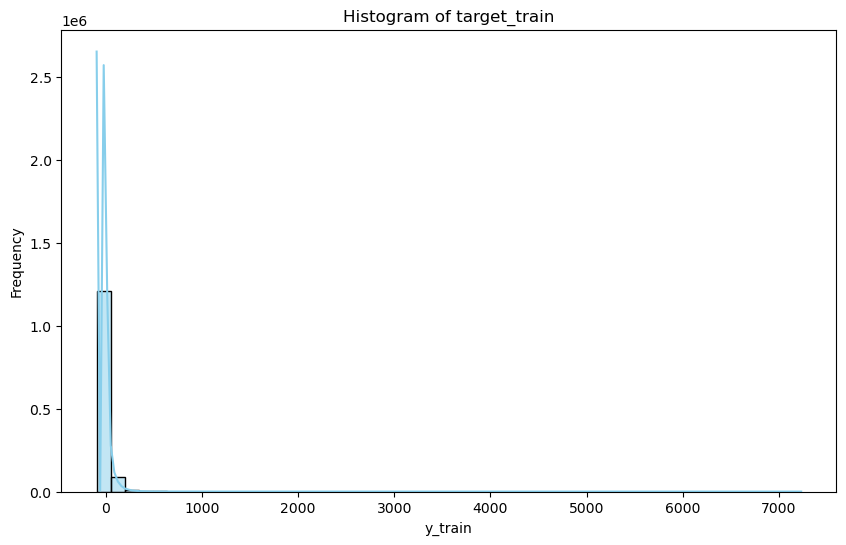

In [382]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data_y_train_imputed, bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of target_train')
plt.xlabel('y_train')
plt.ylabel('Frequency')
plt.show()

In [384]:
import numpy as np

# Data transformation
departure_delay = Data_y_train_imputed

# Handle negative values by shifting to ensure positivity
min_value = departure_delay.min()
if min_value < 0:
    departure_delay = departure_delay - min_value + 1  # Shift values to ensure positivity

# Apply square root transformation
transformed_data_sqrt = np.sqrt(departure_delay)

# Apply log transformation
train = np.log(transformed_data_sqrt)


C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


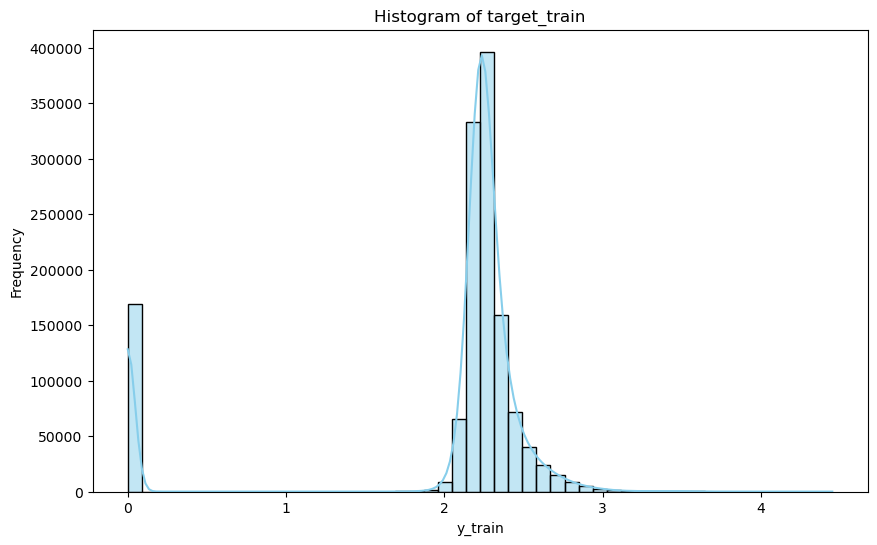

In [385]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(train, bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of target_train')
plt.xlabel('y_train')
plt.ylabel('Frequency')
plt.show()

In [ ]:
Data_y_test.isna().sum()

In [386]:
mode_value = Data_y_test.mode()[0]
Data_y_test_imputed = Data_y_test.fillna(mode_value)

In [387]:
import numpy as np
departure_delay = Data_y_test_imputed
min_value = departure_delay.min()
if min_value < 0:
    departure_delay = departure_delay - min_value + 1  # Shift values to ensure positivity
transformed_data_sqrt = np.sqrt(departure_delay)
test = np.log(transformed_data_sqrt)

In [363]:
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    
    # Count outliers
    num_outliers = outliers.sum()
    
    return num_outliers

# Assuming 'Data' is your DataFrame and 'Feature_Column' is the column you want to detect outliers in
num_outliers = count_outliers_iqr(aa)
print("Number of outliers:", num_outliers)

Number of outliers: 84763


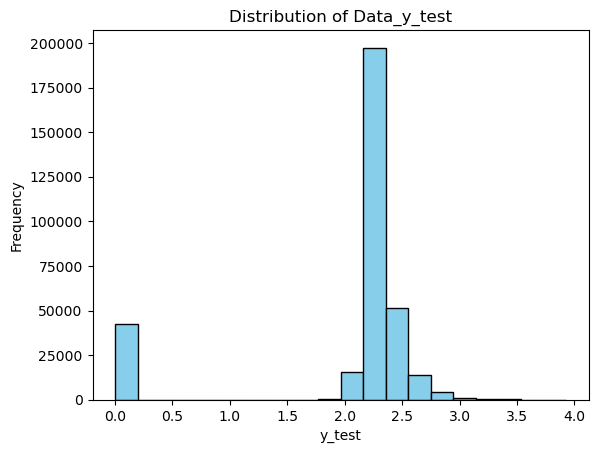

In [388]:
import matplotlib.pyplot as plt
plt.hist(test, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('y_test')
plt.ylabel('Frequency')
plt.title('Distribution of Data_y_test')
plt.show()

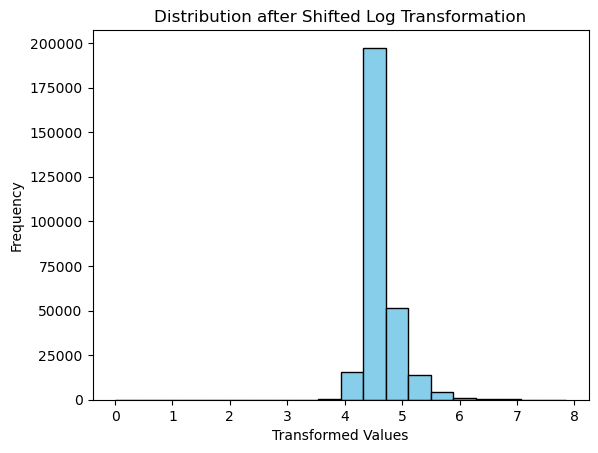

In [84]:
import numpy as np
import matplotlib.pyplot as plt

shifted_data = Data_y_test - Data_y_test.min() + 1  # Shift the data to ensure all values are positive
transformed_data = np.log(shifted_data)  # Apply the natural logarithm transformation

# Plot the histogram of the transformed data
plt.hist(transformed_data, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')
plt.title('Distribution after Shifted Log Transformation')
plt.show()

In [105]:
Data_y_test_featured=transformed_data

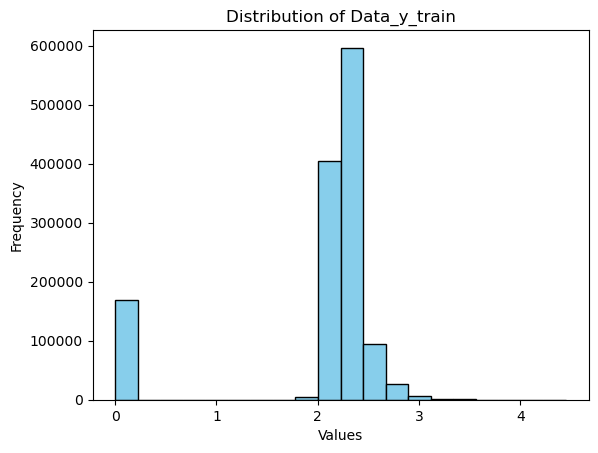

In [389]:
import matplotlib.pyplot as plt

# Assuming Data_y_test is a pandas Series or DataFrame column
plt.hist(train, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Data_y_train')
plt.show()


In [393]:
def get_non_common_features(train_df, test_df):
    train_features = set(train_df.columns)
    test_features = set(test_df.columns)
    non_common_features = train_features.symmetric_difference(test_features)
    return list(non_common_features)

# Example usage:
non_common_features = get_non_common_features(Data, Data_X_test)
print("Non-common features:", non_common_features)

Non-common features: []


In [392]:
Data_X_test['Arrival_State_DE'] = 0

In [138]:
# Check if the column names are the same in both Data_train and Data_test
if list(Data.columns) == list(Data_X_test.columns):
    print("The order of features is the same in Data_train and Data_test.")
else:
    print("The order of features is different in Data_train and Data_test.")


The order of features is the same in Data_train and Data_test.


In [395]:
# Rearrange columns of Data_test to match the order of columns in Data_train
Data_X_test = Data_X_test[Data.columns]

In [402]:
import pandas as pd

# Function to pad times to four digits
def pad_time(time):
    return str(time).zfill(4)

# Apply the padding function to the columns in Data
Data['Scheduled_Arrival_Time'] = Data['Scheduled_Arrival_Time'].apply(pad_time)
Data['Scheduled_Departure_Time'] = Data['Scheduled_Departure_Time'].apply(pad_time)
Data['Actual_Departure_Time'] = Data['Actual_Departure_Time'].apply(pad_time)

# Function to convert time to minutes since midnight
def time_to_minutes(time_str):
    hours = int(time_str[:2])
    # Convert float to integer
    minutes = int(float(time_str[2:]))
    # Handle exceptional case where hours are beyond 24:00
    if hours >= 24:
        hours -= 24
    return hours * 60 + minutes

# Apply the conversion function to the columns in Data
Data['Scheduled_Arrival_Time'] = Data['Scheduled_Arrival_Time'].apply(time_to_minutes)
Data['Scheduled_Departure_Time'] = Data['Scheduled_Departure_Time'].apply(time_to_minutes)
Data['Actual_Departure_Time'] = Data['Actual_Departure_Time'].apply(time_to_minutes)


In [403]:
import pandas as pd
# Function to pad times to four digits
def pad_time(time):
    return str(time).zfill(4)
# Apply the padding function to the columns in Data_X_test
Data_X_test['Scheduled_Arrival_Time'] = Data_X_test['Scheduled_Arrival_Time'].apply(pad_time)
Data_X_test['Scheduled_Departure_Time'] = Data_X_test['Scheduled_Departure_Time'].apply(pad_time)
Data_X_test['Actual_Departure_Time'] = Data_X_test['Actual_Departure_Time'].apply(pad_time)
# Function to convert time to minutes since midnight
def time_to_minutes(time_str):
    hours = int(time_str[:2])
    # Convert float to integer
    minutes = int(float(time_str[2:]))
    # Handle exceptional case where hours are beyond 24:00
    if hours >= 24:
        hours -= 24
    return hours * 60 + minutes
# Apply the conversion function to the columns in Data_X_test
Data_X_test['Scheduled_Arrival_Time'] = Data_X_test['Scheduled_Arrival_Time'].apply(time_to_minutes)
Data_X_test['Scheduled_Departure_Time'] = Data_X_test['Scheduled_Departure_Time'].apply(time_to_minutes)
Data_X_test['Actual_Departure_Time'] = Data_X_test['Actual_Departure_Time'].apply(time_to_minutes)

C:\Users\asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


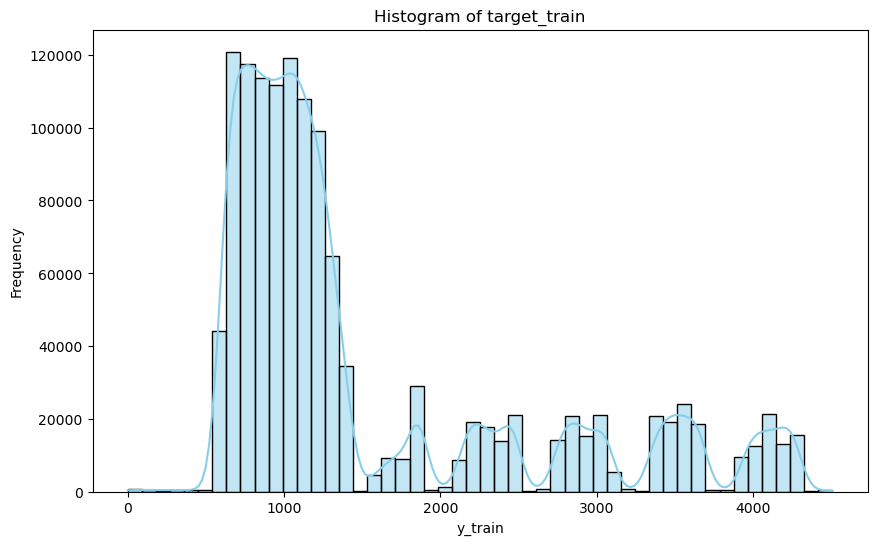

In [411]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of transformed data
plt.figure(figsize=(10, 6))
sns.histplot(Data['Actual_Departure_Time'], bins=50, kde=True, color='skyblue', edgecolor='black')
plt.title('Histogram of target_train')
plt.xlabel('y_train')
plt.ylabel('Frequency')
plt.show()

In [155]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize
columns_to_normalize = ['Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'Actual_Departure_Time']

# Create a new DataFrame with only the selected columns
Data_selected = Data[columns_to_normalize]

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the selected columns
Data_normalized = min_max_scaler.fit_transform(Data_selected)

# Create a DataFrame from the normalized data
Data_normalized_df = pd.DataFrame(Data_normalized, columns=columns_to_normalize)

# Replace the original columns with the normalized ones
Data[columns_to_normalize] = Data_normalized_df


In [156]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to normalize
columns_to_normalize = ['Scheduled_Arrival_Time', 'Scheduled_Departure_Time', 'Actual_Departure_Time']

# Create a new DataFrame with only the selected columns
Data_X_test_selected = Data_X_test[columns_to_normalize]

# Initialize MinMaxScaler
min_max_scaler = MinMaxScaler()

# Fit and transform the selected columns
Data_X_test_normalized = min_max_scaler.fit_transform(Data_X_test_selected)

# Create a DataFrame from the normalized data
Data_X_test_normalized_df = pd.DataFrame(Data_X_test_normalized, columns=columns_to_normalize)

# Replace the original columns with the normalized ones
Data_X_test[columns_to_normalize] = Data_X_test_normalized_df


In [217]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Fit linear regression model
linear_reg = LinearRegression()
linear_reg.fit(Data, Data_y_train)

# Predict on the test data
predictions = linear_reg.predict(Data_X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(Data_y_test, predictions)
print("MAPE:", mape)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(Data_y_test, predictions))
print("RMSE:", rmse)

MAPE: 30.487774686621634
RMSE: 52.20463651668161


In [159]:
missing_values_count = Data.isnull().sum()
print("Features with missing values:")
print(missing_values_count[missing_values_count > 0])

Features with missing values:
Series([], dtype: int64)


In [100]:
import numpy as np
mean_value = np.mean(transformed_data_new)
std_dev = np.std(transformed_data_new)
min_value = np.min(transformed_data_new)
percentile_25 = np.percentile(transformed_data_new, 25)
median_value = np.median(transformed_data_new)
percentile_75 = np.percentile(transformed_data_new, 75)
max_value = np.max(transformed_data_new)
print("Mean:", mean_value)
print("Standard Deviation:", std_dev)
print("Minimum:", min_value)
print("25th Percentile:", percentile_25)
print("Median:", median_value)
print("75th Percentile:", percentile_75)
print("Maximum:", max_value)

Mean: 4.569031602732941
Standard Deviation: 0.28700534527984883
Minimum: 0.0
25th Percentile: 4.418490182522342
Median: 4.509711292223341
75th Percentile: 4.6338895833612845
Maximum: 8.89948934086698


In [161]:
import numpy as np
# Assuming 'New_Data_y_test' is your new pandas Series or DataFrame column
shifted_data_new = Data_y_train - Data_y_train.min() + 1  # Shift the data to ensure all values are positive
transformed_data_new = np.log(shifted_data_new)  # Apply the natural logarithm transformation

In [162]:
Data_y_train_featured=transformed_data_new

In [165]:
import numpy as np
# Assuming 'New_Data_y_test' is your new pandas Series or DataFrame column
shifted_data_new = Data_y_test - Data_y_test.min() + 1  # Shift the data to ensure all values are positive
transformed_data_new = np.log(shifted_data_new)  # Apply the natural logarithm transformation

In [166]:
Data_y_test_featured=transformed_data_new

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error


# Instantiate the linear regression model
linear_reg = LinearRegression()

# Fit linear regression model
linear_reg.fit(Data, Data_y_train_featured)

# Predict on test data
predictions = linear_reg.predict(Data_X_test)

# Calculate MAPE
mape = mean_absolute_percentage_error(Data_y_test_featured, predictions)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Percentage Error (MAPE): 63042793206.05125


In [107]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate additional evaluation metrics
mae = mean_absolute_error(Data_y_test_featured, predictions)
mse = mean_squared_error(Data_y_test_featured, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(Data_y_test_featured, predictions)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2)


Mean Absolute Error (MAE): 104.0166559604353
Mean Squared Error (MSE): 13526.153433431222
Root Mean Squared Error (RMSE): 116.30199238805508
R-squared (R2): -3.997303280448161
